# **WorldQuant University Capstone for MScFE 690 (Group 9184)**

## Data Extraction. Data Transformation. Methodology Description. Reinforcement Learning. Traditional Approaches. Model Development. Performance Comparison and Analysis. DynaCAAST Framework.


<br><br>


|**DynaCAAST framework for RL based trading agents**| |
|:---|:---|
|**TEAM MEMBER 1** | Farai Masunda  |
|**TEAM MEMBER 2**  |      Bhaskar Vedula  |


<hr style='border:4px solid black'>

<hr style='border:2px solid black'>

## **Section 7: Training and testing of traditional and RL agents (Part 2)**


In this section, we train and test all our approaches/agents with the training and testing data that we had created earlier.

## **E. A2C RL Model with TI as the state of the RL agent**

In [ ]:
stock_dimension = len(tickers)
state_space = stock_dimension

In [ ]:
env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": ti_abbreviations,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

In [ ]:
e_train_gym = StockPortfolioEnv(df = train_data_ti, **env_kwargs)

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

In [ ]:
# initialize
agent = DRLAgent(env = env_train)
model_a2c_ti = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS_TI)


{'n_steps': 500, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device


In [ ]:
trained_a2c_ti = agent.train_model(model=model_a2c_ti, tb_log_name='a2c', total_timesteps=total_timesteps_)
DynaCAAST_Model['a2c_ti'] = trained_a2c_ti

In [ ]:
import time
# A2C Train Model
e_trade_gym = StockPortfolioEnv(df = train_data_ti, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

a2c_train_returns_ti, _ = DRLAgent.DRL_prediction(model=trained_a2c_ti, test_data = train_data_ti, test_env = env_trade, test_obs = obs_trade)

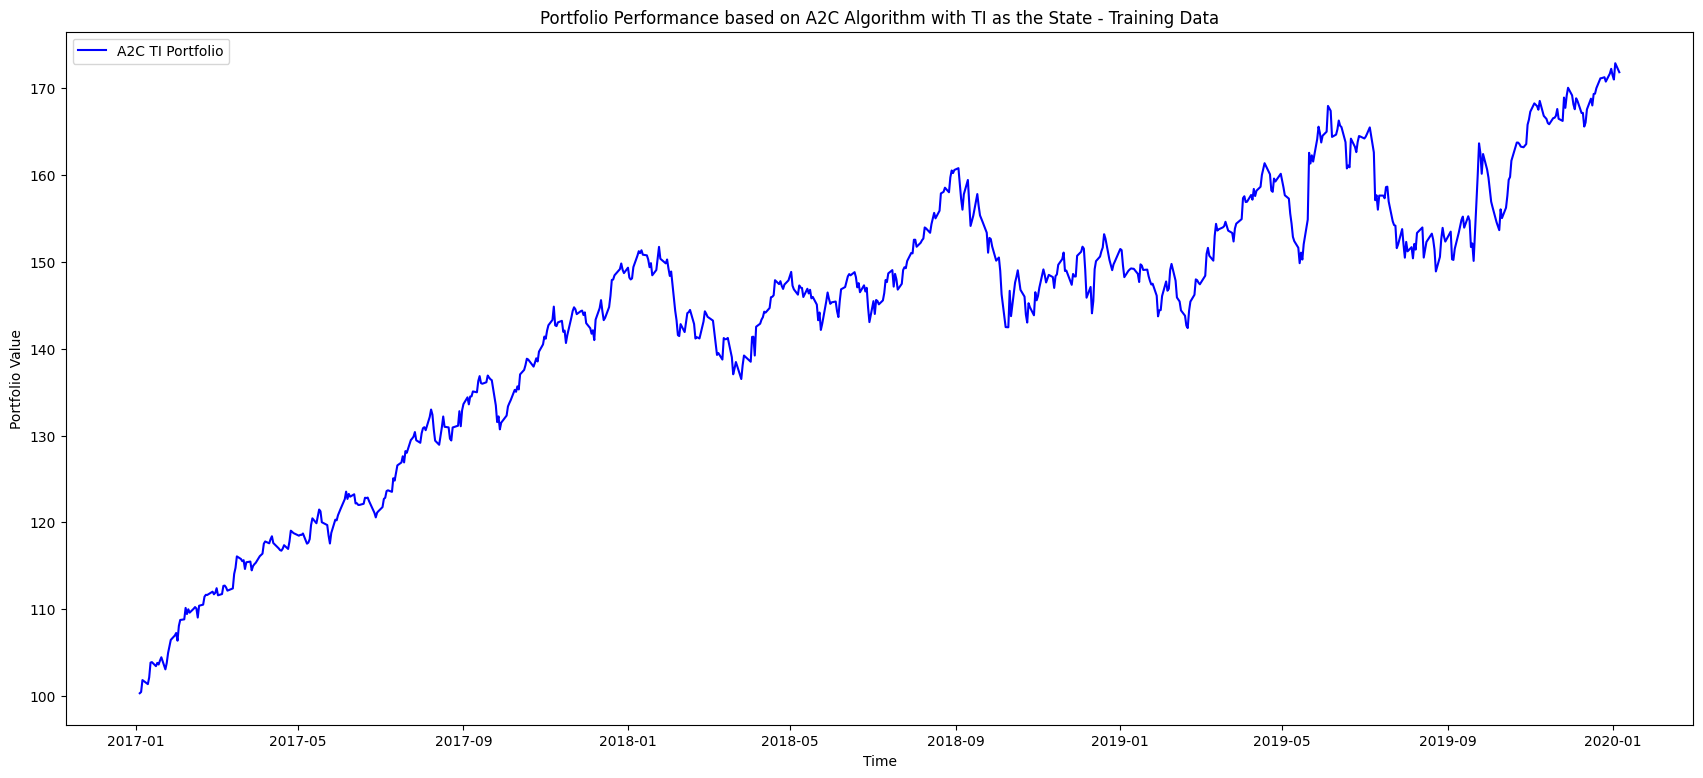

Final Portfolio Value: 171.85
Total Return: 71.85
Annualized Return: 20.25%
Sharpe Ratio: 1.4009
Maximum draw down(%): -11.4562


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(a2c_train_returns_ti)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = a2c_train_returns_ti['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="A2C TI Portfolio", color="blue")
plt.title("Portfolio Performance based on A2C Algorithm with TI as the State - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_a2c_ti"] = portfolio_returns

# Calculate performance metrics
final_value_trg_a2c_ti = capital
total_return_trg_a2c_ti = final_value_trg_a2c_ti - initial_capital
sharpe_ratio_trg_a2c_ti = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_a2c_ti = (final_value_trg_a2c_ti / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_a2c_ti = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_a2c_ti:.2f}")
print(f"Total Return: {total_return_trg_a2c_ti:.2f}")
print(f"Annualized Return: {annualized_return_trg_a2c_ti * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_a2c_ti:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_a2c_ti:.4f}")

In [ ]:
# A2C Test Model
import time
e_trade_gym = StockPortfolioEnv(df = test_data_ti, **env_kwargs)
env_a2c_ti_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_ti_test'] = copy.copy(env_a2c_ti_test)
DynaCAAST_Obs['a2c_ti_test'] = obs_trade.copy()
a2c_test_returns_ti, _ = DRLAgent.DRL_prediction(model=trained_a2c_ti, test_data = test_data_ti, test_env = env_a2c_ti_test, test_obs = obs_trade)

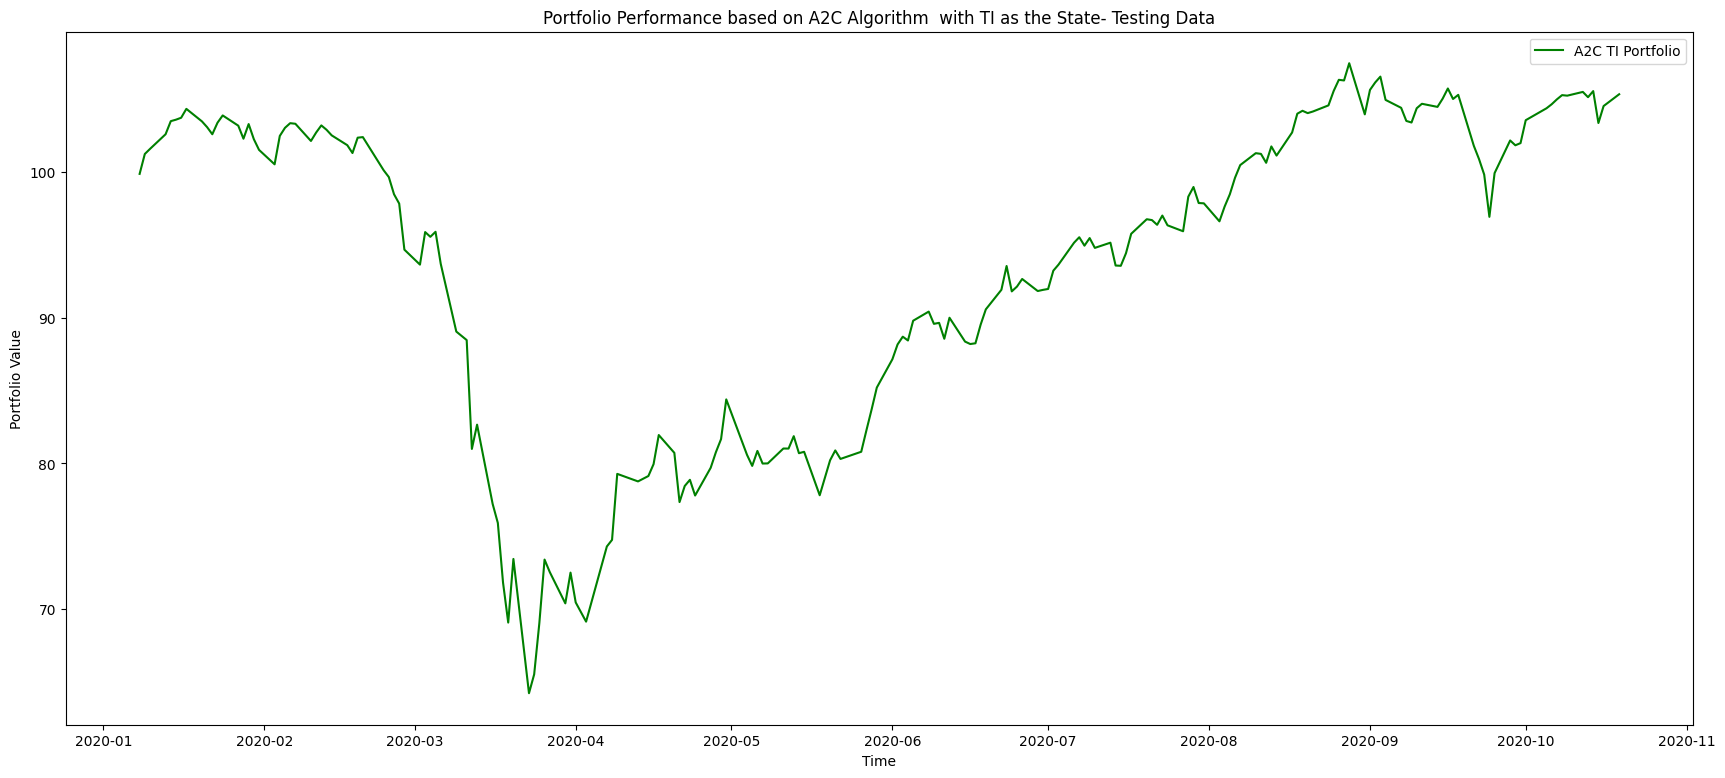

Final Portfolio Value: 105.32
Total Return: 5.32
Annualized Return: 6.89%
Sharpe Ratio : 0.3706
Maximum draw down(%): -38.4130


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(a2c_test_returns_ti)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = a2c_test_returns_ti['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(a2c_test_returns_ti["date"][1:], portfolio_values, label="A2C TI Portfolio", color="green")
plt.title("Portfolio Performance based on A2C Algorithm  with TI as the State- Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_a2c_ti"] = portfolio_returns

# Calculate performance metrics
final_value_test_a2c_ti = capital
total_return_test_a2c_ti = final_value_test_a2c_ti - initial_capital
sharpe_ratio_test_a2c_ti = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_a2c_ti = (final_value_test_a2c_ti / initial_capital) ** (1 / (len(returns_test_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_a2c_ti = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_a2c_ti:.2f}")
print(f"Total Return: {total_return_test_a2c_ti:.2f}")
print(f"Annualized Return: {annualized_return_test_a2c_ti * 100:.2f}%")
print(f"Sharpe Ratio : {sharpe_ratio_test_a2c_ti:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_a2c_ti:.4f}")

## **F. PPO RL Model with TI as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)

model_ppo_ti = agent.get_model("ppo",model_kwargs = PPO_PARAMS_TI)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device


In [ ]:
trained_ppo_ti = agent.train_model(model=model_ppo_ti, tb_log_name='ppo', total_timesteps=total_timesteps_)
DynaCAAST_Model['ppo_ti'] = trained_ppo_ti

-----------------------------
| time/              |      |
|    fps             | 464  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 403       |
|    iterations           | 2         |
|    time_elapsed         | 10        |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -38.3     |
|    explained_variance   | 0         |
|    learning_rate        | 0.0001    |
|    loss                 | 3.09e+14  |
|    n_updates            | 10        |
|    policy_gradient_loss | -1.16e-06 |
|    std                  | 1         |
|    value_loss           | 6.55e+14  |
---------------------------------------
------------------------------

In [ ]:
# PPO Train Model
e_trade_gym = StockPortfolioEnv(df = train_data_ti, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ppo_train_returns_ti, _ = DRLAgent.DRL_prediction(model=trained_ppo_ti, test_data = train_data_ti, test_env = env_trade, test_obs = obs_trade)

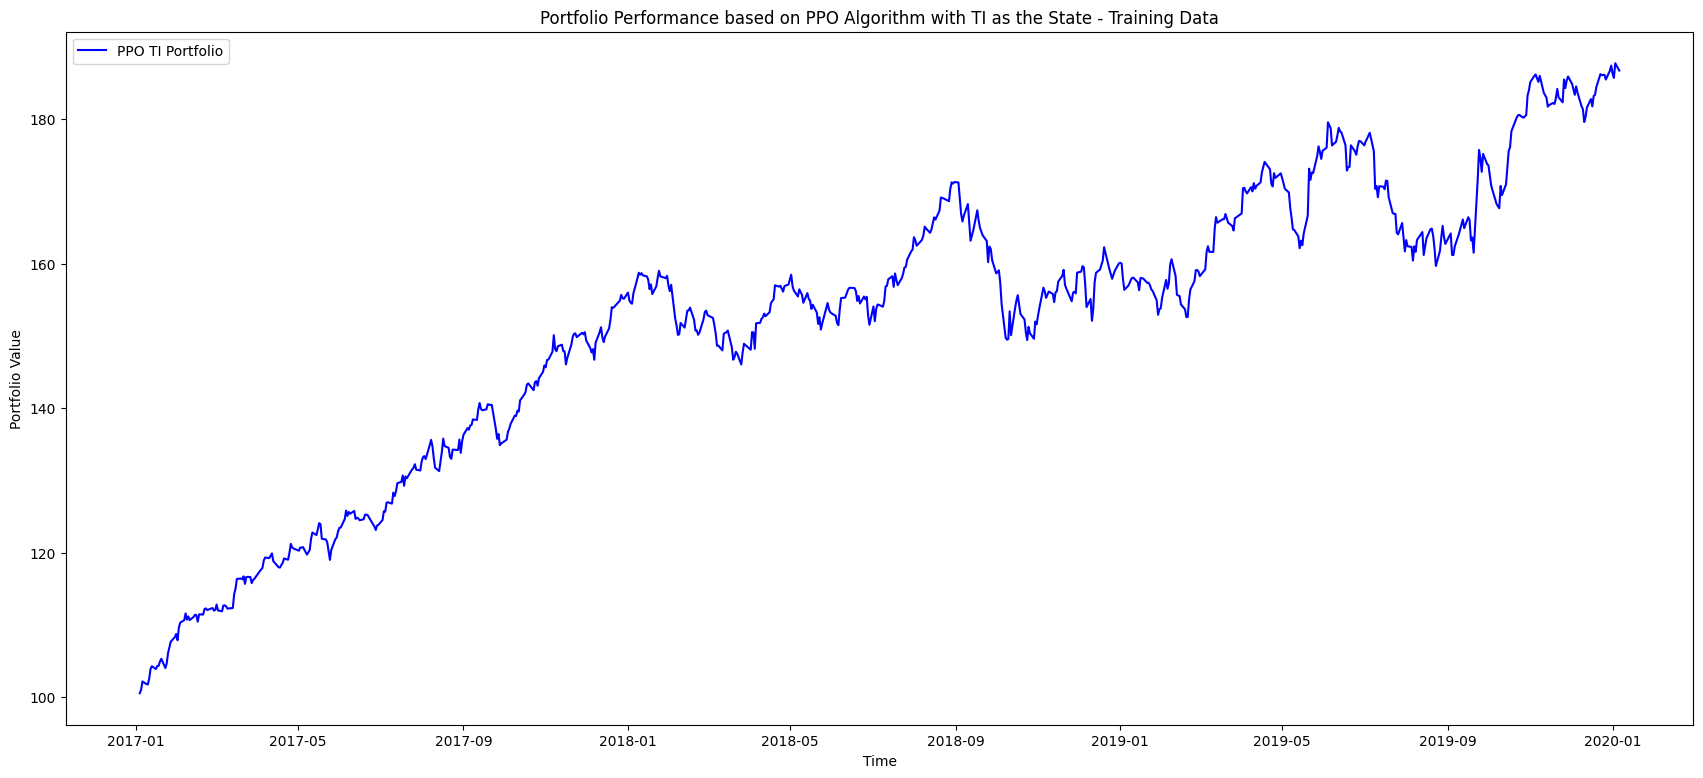

Final Portfolio Value: 186.76
Total Return: 86.76
Annualized Return: 23.70%
Sharpe Ratio: 1.6373
Maximum draw down(%): -12.7729


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ppo_train_returns_ti)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ppo_train_returns_ti['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="PPO TI Portfolio", color="blue")
plt.title("Portfolio Performance based on PPO Algorithm with TI as the State - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_ppo_ti"] = portfolio_returns

# Calculate performance metrics
final_value_trg_ppo_ti = capital
total_return_trg_ppo_ti = final_value_trg_ppo_ti - initial_capital
sharpe_ratio_trg_ppo_ti = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_ppo_ti = (final_value_trg_ppo_ti / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_ppo_ti = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_ppo_ti:.2f}")
print(f"Total Return: {total_return_trg_ppo_ti:.2f}")
print(f"Annualized Return: {annualized_return_trg_ppo_ti * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_ppo_ti:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_ppo_ti:.4f}")

In [ ]:
# PPO Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_ti, **env_kwargs)
env_ppo_ti_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_ti_test'] = copy.copy(env_ppo_ti_test)
DynaCAAST_Obs['ppo_ti_test'] = obs_trade.copy()

ppo_test_returns_ti, _ = DRLAgent.DRL_prediction(model=trained_ppo_ti, test_data = test_data_ti, test_env = env_ppo_ti_test, test_obs = obs_trade)

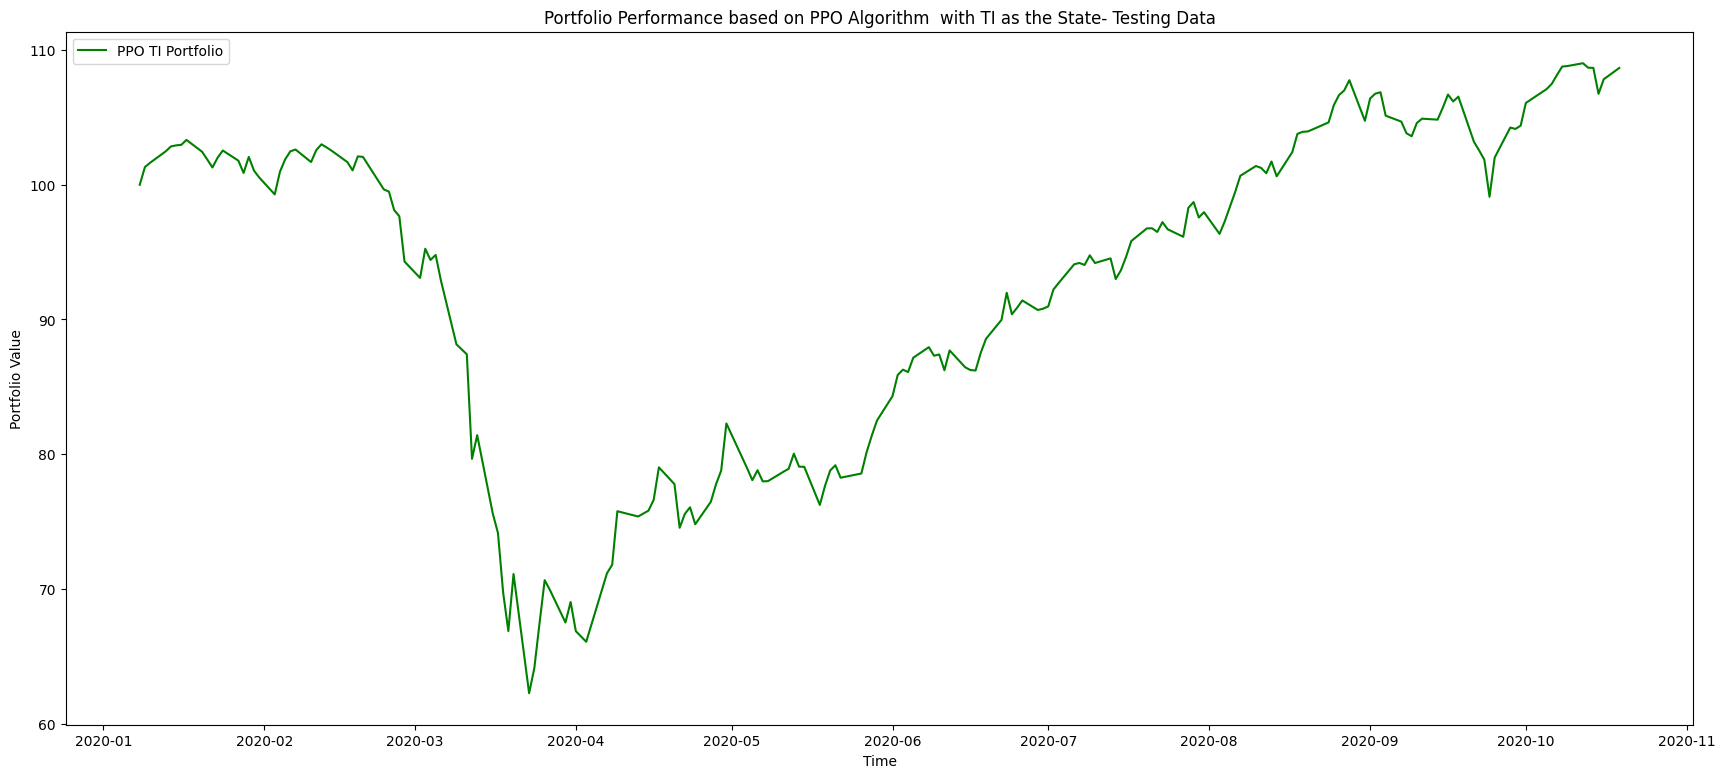

Final Portfolio Value: 108.67
Total Return: 8.67
Annualized Return: 11.29%
Sharpe Ratio: 0.4902
Maximum draw down(%): -39.7532


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ppo_test_returns_ti)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ppo_test_returns_ti['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(ppo_test_returns_ti["date"][1:], portfolio_values, label="PPO TI Portfolio", color="green")
plt.title("Portfolio Performance based on PPO Algorithm  with TI as the State- Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_ppo_ti"] = portfolio_returns

# Calculate performance metrics
final_value_test_ppo_ti = capital
total_return_test_ppo_ti = final_value_test_ppo_ti - initial_capital
sharpe_ratio_test_ppo_ti = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_ppo_ti = (final_value_test_ppo_ti / initial_capital) ** (1 / (len(ppo_test_returns_ti) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_ppo_ti = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_ppo_ti:.2f}")
print(f"Total Return: {total_return_test_ppo_ti:.2f}")
print(f"Annualized Return: {annualized_return_test_ppo_ti * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_ppo_ti:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_ppo_ti:.4f}")

## **G. DDPG RL Model with TI as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)
model_ddpg_ti = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS_TI)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [ ]:
trained_ddpg_ti = agent.train_model(model=model_ddpg_ti, tb_log_name='ddpg',  total_timesteps=total_timesteps_)
DynaCAAST_Model['ddpg_ti'] = trained_ddpg_ti

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 33        |
|    time_elapsed    | 88        |
|    total_timesteps | 2960      |
| train/             |           |
|    actor_loss      | -2.12e+07 |
|    critic_loss     | 1.89e+10  |
|    learning_rate   | 0.001     |
|    n_updates       | 2859      |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 32        |
|    time_elapsed    | 182       |
|    total_timesteps | 5920      |
| train/             |           |
|    actor_loss      | -3.95e+07 |
|    critic_loss     | 6.26e+10  |
|    learning_rate   | 0.001     |
|    n_updates       | 5819      |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 12        |
|    fps             | 32        |
|    time_elapsed   

In [ ]:
# DDPG Train Model num_stock = df_pct_change.shape[1]
e_trade_gym = StockPortfolioEnv(df = train_data_ti, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ddpg_train_returns_ti, _ = DRLAgent.DRL_prediction(model=trained_ddpg_ti, test_data = train_data_ti, test_env = env_trade, test_obs = obs_trade)

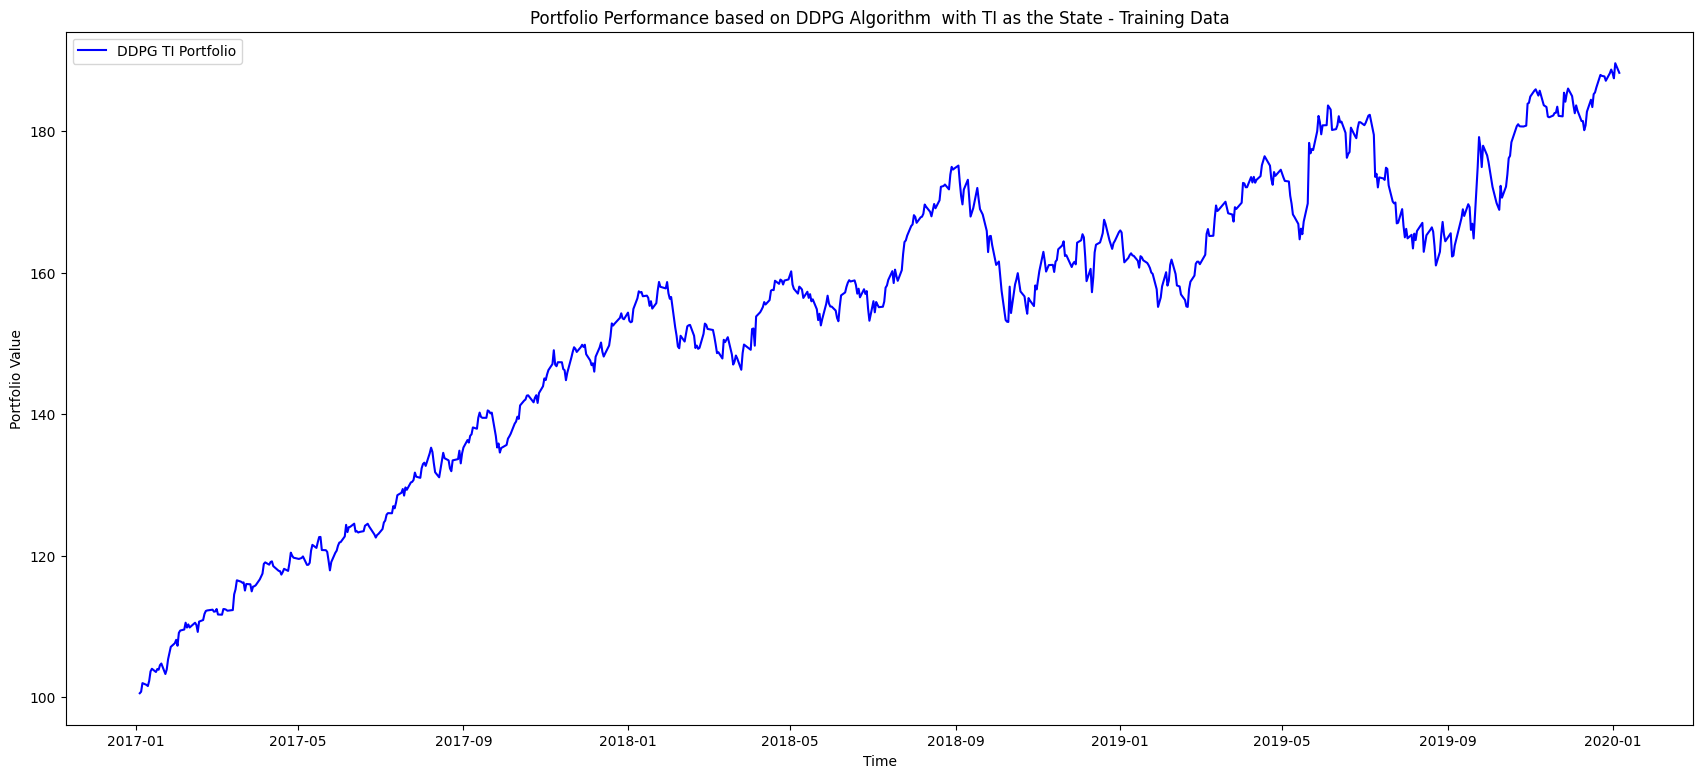

Final Portfolio Value: 188.27
Total Return: 88.27
Annualized Return: 24.04%
Sharpe Ratio: 1.6038
Maximum draw down(%): -12.6296


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ddpg_train_returns_ti)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ddpg_train_returns_ti['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="DDPG TI Portfolio", color="blue")
plt.title("Portfolio Performance based on DDPG Algorithm  with TI as the State - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_ddpg_ti"] = portfolio_returns

# Calculate performance metrics
final_value_trg_ddpg_ti = capital
total_return_trg_ddpg_ti = final_value_trg_ddpg_ti - initial_capital
sharpe_ratio_trg_ddpg_ti = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_ddpg_ti = (final_value_trg_ddpg_ti / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_ddpg_ti = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_ddpg_ti:.2f}")
print(f"Total Return: {total_return_trg_ddpg_ti:.2f}")
print(f"Annualized Return: {annualized_return_trg_ddpg_ti * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_ddpg_ti:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_ddpg_ti:.4f}")

In [ ]:
# DDPG Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_ti, **env_kwargs)
env_ddpg_ti_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_ti_test'] = copy.copy(env_ddpg_ti_test)
DynaCAAST_Obs['ddpg_ti_test'] = obs_trade.copy()
ddpg_test_returns_ti, _ = DRLAgent.DRL_prediction(model=trained_ddpg_ti, test_data = test_data_ti, test_env = env_ddpg_ti_test, test_obs = obs_trade)

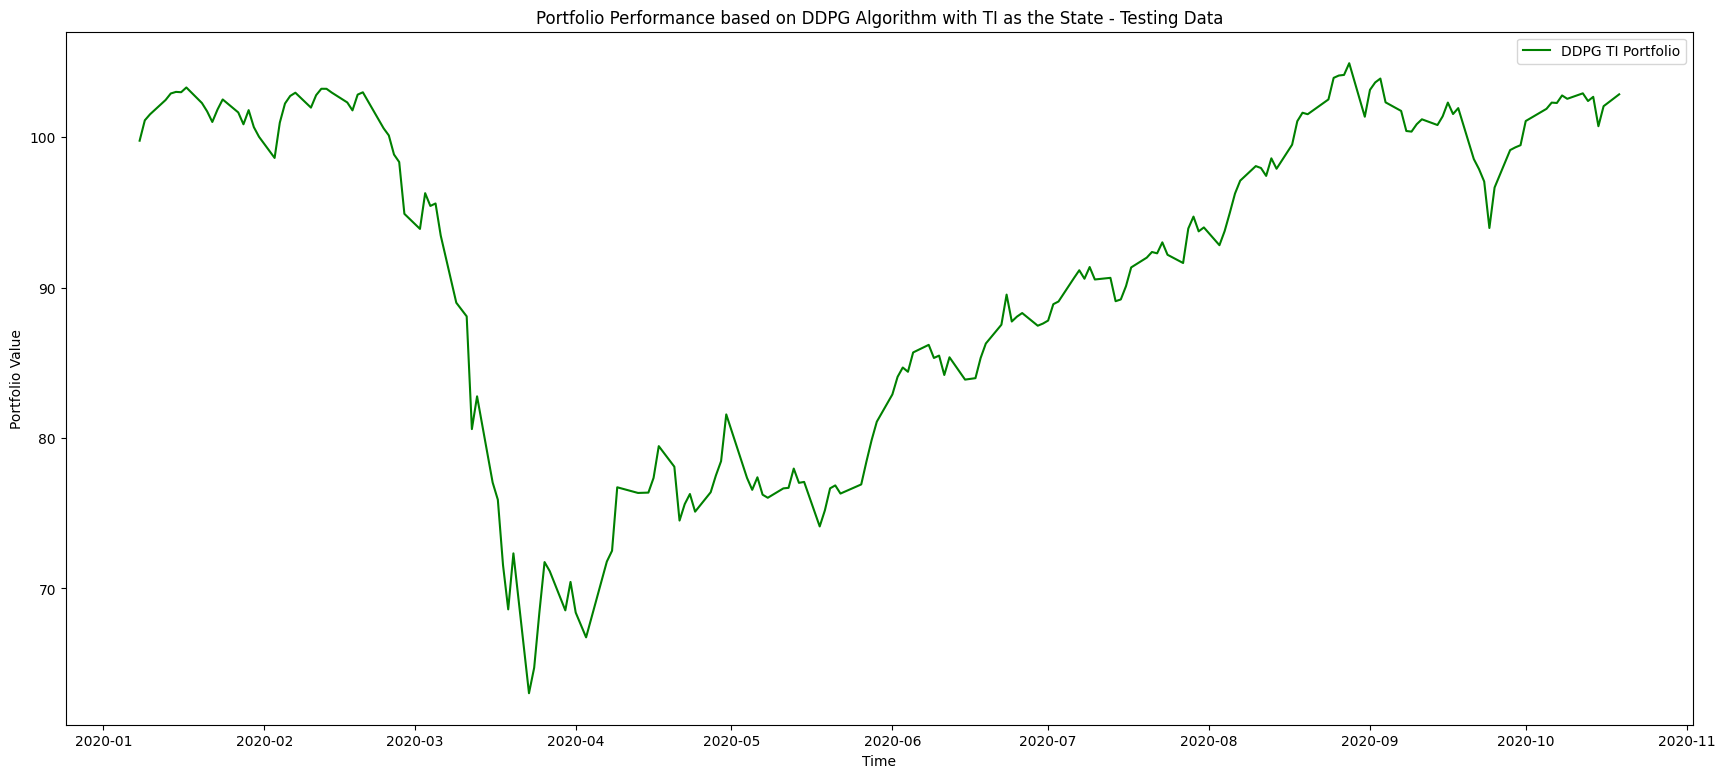

Final Portfolio Value: 102.84
Total Return: 2.84
Annualized Return: 3.67%
Sharpe Ratio: 0.2812
Maximum draw down(%): -38.9748


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ddpg_test_returns_ti)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ddpg_test_returns_ti['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(ddpg_test_returns_ti["date"][1:], portfolio_values, label="DDPG TI Portfolio", color="green")
plt.title("Portfolio Performance based on DDPG Algorithm with TI as the State - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_ddpg_ti"] = portfolio_returns

# Calculate performance metrics
final_value_test_ddpg_ti = capital
total_return_test_ddpg_ti = final_value_test_ddpg_ti - initial_capital
sharpe_ratio_test_ddpg_ti = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_ddpg_ti = (final_value_test_ddpg_ti / initial_capital) ** (1 / (len(ddpg_test_returns_ti) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_ddpg_ti = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_ddpg_ti:.2f}")
print(f"Total Return: {total_return_test_ddpg_ti:.2f}")
print(f"Annualized Return: {annualized_return_test_ddpg_ti * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_ddpg_ti:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_ddpg_ti:.4f}")

## **H. SAC RL Model with TI as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)
model_sac_ti = agent.get_model("sac",model_kwargs = SAC_PARAMS_TI)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0003, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


In [ ]:
trained_sac_ti = agent.train_model(model=model_sac_ti, tb_log_name='sac', total_timesteps=total_timesteps_)
DynaCAAST_Model['sac_ti'] = trained_sac_ti

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 28        |
|    time_elapsed    | 102       |
|    total_timesteps | 2960      |
| train/             |           |
|    actor_loss      | -2.08e+07 |
|    critic_loss     | 4.03e+10  |
|    ent_coef        | 0.235     |
|    ent_coef_loss   | 532       |
|    learning_rate   | 0.0003    |
|    n_updates       | 2859      |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 28        |
|    time_elapsed    | 208       |
|    total_timesteps | 5920      |
| train/             |           |
|    actor_loss      | -3.75e+07 |
|    critic_loss     | 2.65e+10  |
|    ent_coef        | 0.572     |
|    ent_coef_loss   | 206       |
|    learning_rate   | 0.0003    |
|    n_updates       | 5819      |
----------------------------------
--------------------

In [ ]:
#  SAC Train Model num_stock = df_pct_change.shape[1]
e_trade_gym = StockPortfolioEnv(df = train_data_ti, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

sac_train_returns_ti, _ = DRLAgent.DRL_prediction(model=trained_sac_ti, test_data = train_data_ti, test_env = env_trade, test_obs = obs_trade)

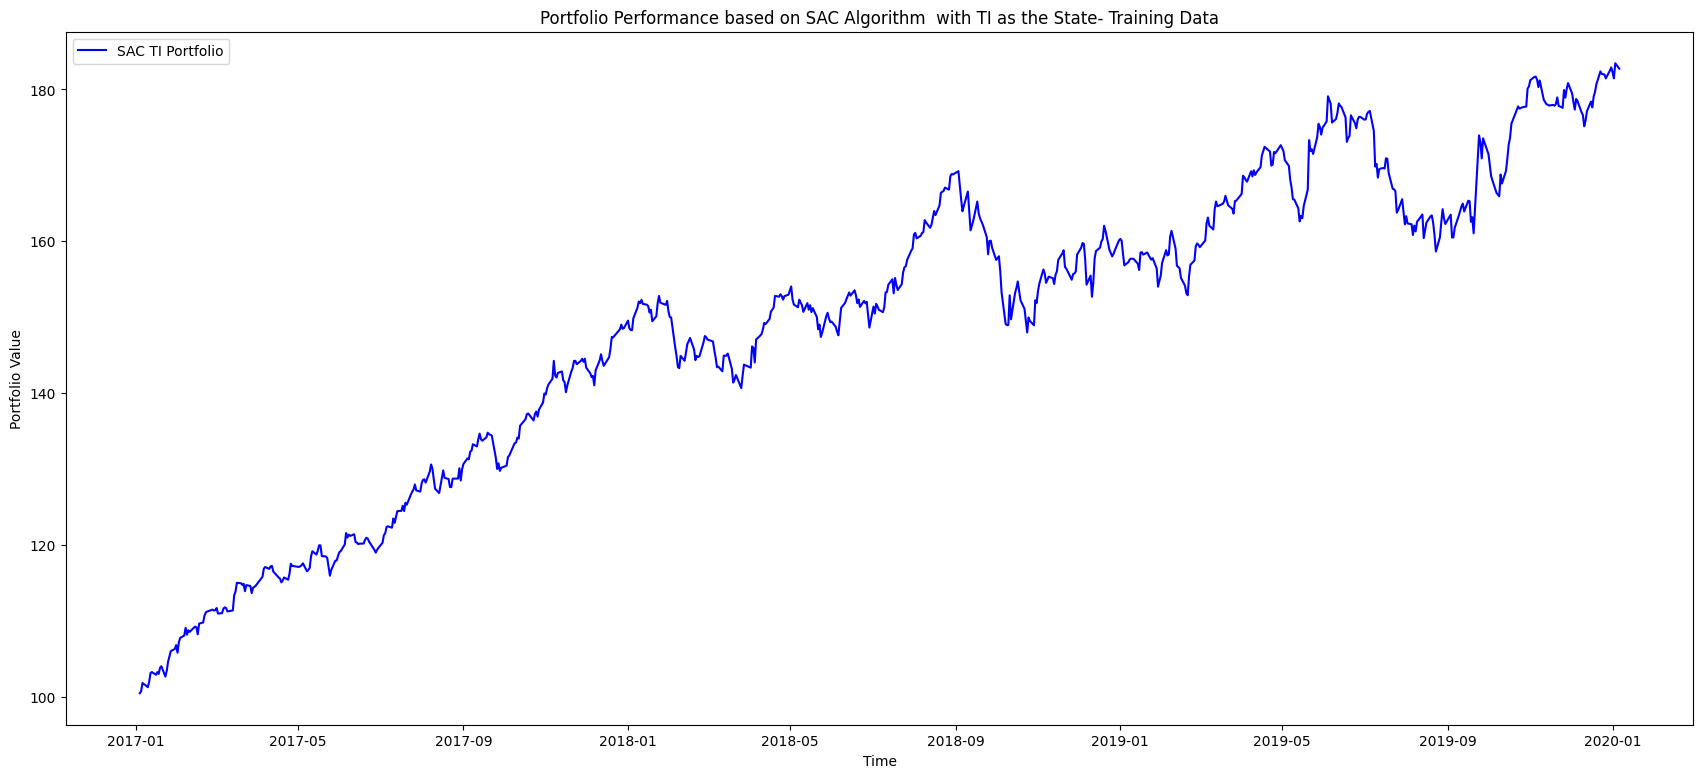

Final Portfolio Value: 182.73
Total Return: 82.73
Annualized Return: 22.79%
Sharpe Ratio Kelly: 1.6650
Maximum draw down(%): -12.5526


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(sac_train_returns_ti)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = sac_train_returns_ti['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="SAC TI Portfolio", color="blue")
plt.title("Portfolio Performance based on SAC Algorithm  with TI as the State- Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_sac_ti"] = portfolio_returns

# Calculate performance metrics
final_value_trg_sac_ti = capital
total_return_trg_sac_ti = final_value_trg_sac_ti - initial_capital
sharpe_ratio_trg_sac_ti = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_sac_ti = (final_value_trg_sac_ti / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_sac_ti = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_sac_ti:.2f}")
print(f"Total Return: {total_return_trg_sac_ti:.2f}")
print(f"Annualized Return: {annualized_return_trg_sac_ti * 100:.2f}%")
print(f"Sharpe Ratio Kelly: {sharpe_ratio_trg_sac_ti:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_sac_ti:.4f}")

In [ ]:
# SAC Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_ti, **env_kwargs)
env_sac_ti_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_ti_test'] = copy.copy(env_sac_ti_test)
DynaCAAST_Obs['sac_ti_test'] = copy.copy(obs_trade)
sac_test_returns_ti, _ = DRLAgent.DRL_prediction(model=trained_sac_ti, test_data = test_data_ti, test_env = env_sac_ti_test, test_obs = obs_trade)

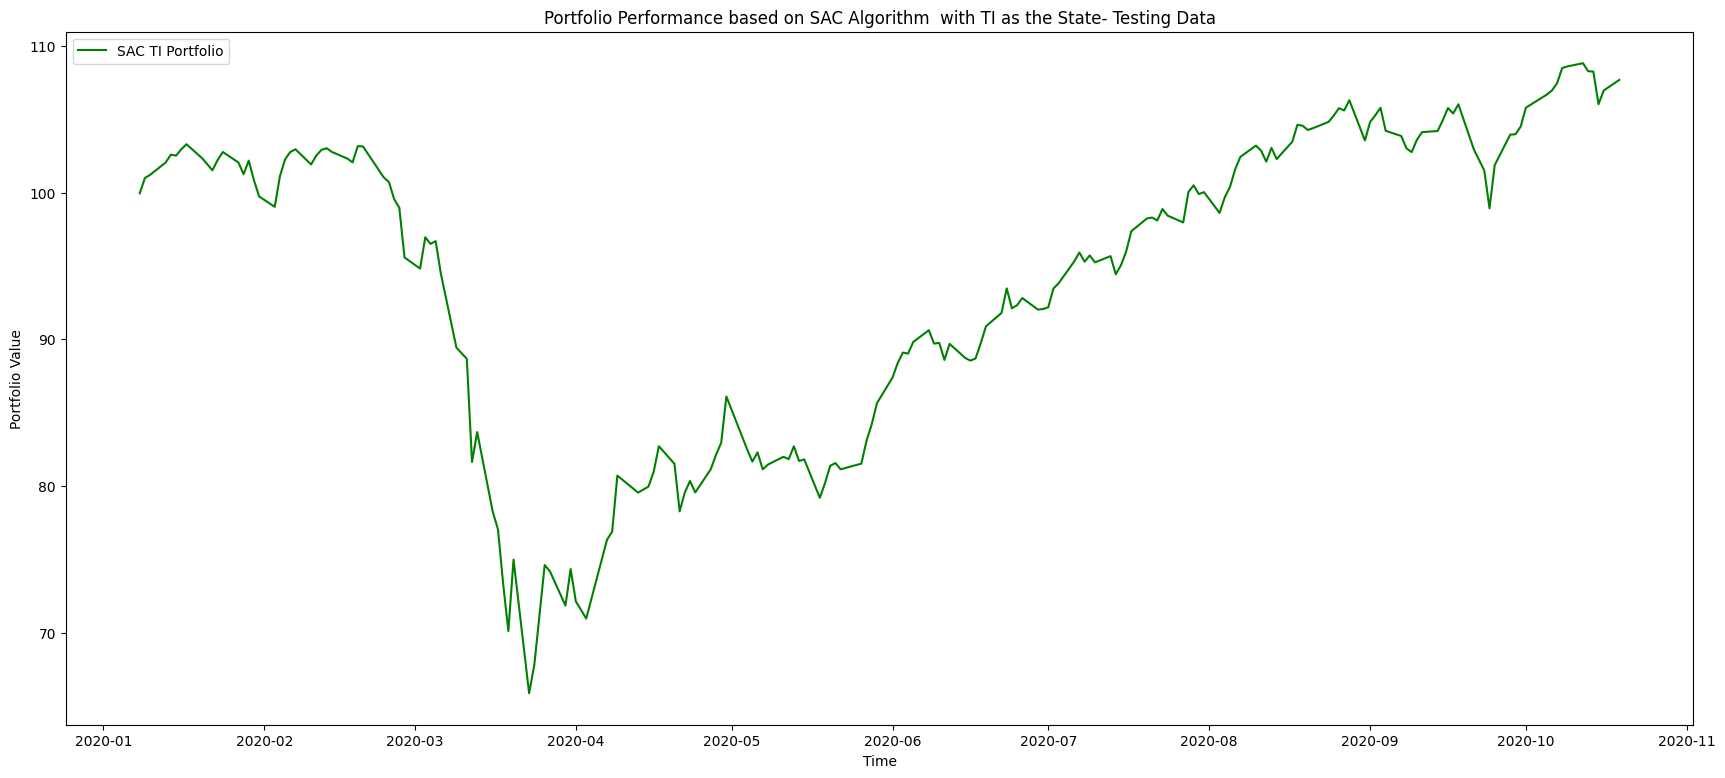

Final Portfolio Value: 107.69
Total Return: 7.69
Annualized Return: 9.99%
Sharpe Ratio: 0.4608
Maximum draw down(%): -36.2377


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(sac_test_returns_ti)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = sac_test_returns_ti['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(sac_test_returns_ti["date"][1:], portfolio_values, label="SAC TI Portfolio", color="green")
plt.title("Portfolio Performance based on SAC Algorithm  with TI as the State- Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_sac_ti"] = portfolio_returns

# Calculate performance metrics
final_value_test_sac_ti = capital
total_return_test_sac_ti = final_value_test_sac_ti - initial_capital
sharpe_ratio_test_sac_ti = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_sac_ti = (final_value_test_sac_ti / initial_capital) ** (1 / (len(sac_test_returns_ti) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_sac_ti = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_sac_ti:.2f}")
print(f"Total Return: {total_return_test_sac_ti:.2f}")
print(f"Annualized Return: {annualized_return_test_sac_ti * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_sac_ti:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_sac_ti:.4f}")

## **I. TD3 RL Model with TI as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)
model_td3_ti = agent.get_model("td3",model_kwargs = TD3_PARAMS_TI)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


In [ ]:
trained_td3_ti = agent.train_model(model=model_td3_ti, tb_log_name='td3', total_timesteps=total_timesteps_)
DynaCAAST_Model['td3_ti'] = trained_td3_ti

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 34        |
|    time_elapsed    | 86        |
|    total_timesteps | 2960      |
| train/             |           |
|    actor_loss      | -1.14e+07 |
|    critic_loss     | 1.88e+10  |
|    learning_rate   | 0.001     |
|    n_updates       | 2859      |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 33        |
|    time_elapsed    | 179       |
|    total_timesteps | 5920      |
| train/             |           |
|    actor_loss      | -2.18e+07 |
|    critic_loss     | 4.72e+11  |
|    learning_rate   | 0.001     |
|    n_updates       | 5819      |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 12        |
|    fps             | 32        |
|    time_elapsed   

In [ ]:
# td3 Train Model num_stock = df_pct_change.shape[1]
e_trade_gym = StockPortfolioEnv(df = train_data_ti, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

td3_train_returns_ti, _ = DRLAgent.DRL_prediction(model=trained_td3_ti, test_data = train_data_ti, test_env = env_trade, test_obs = obs_trade)

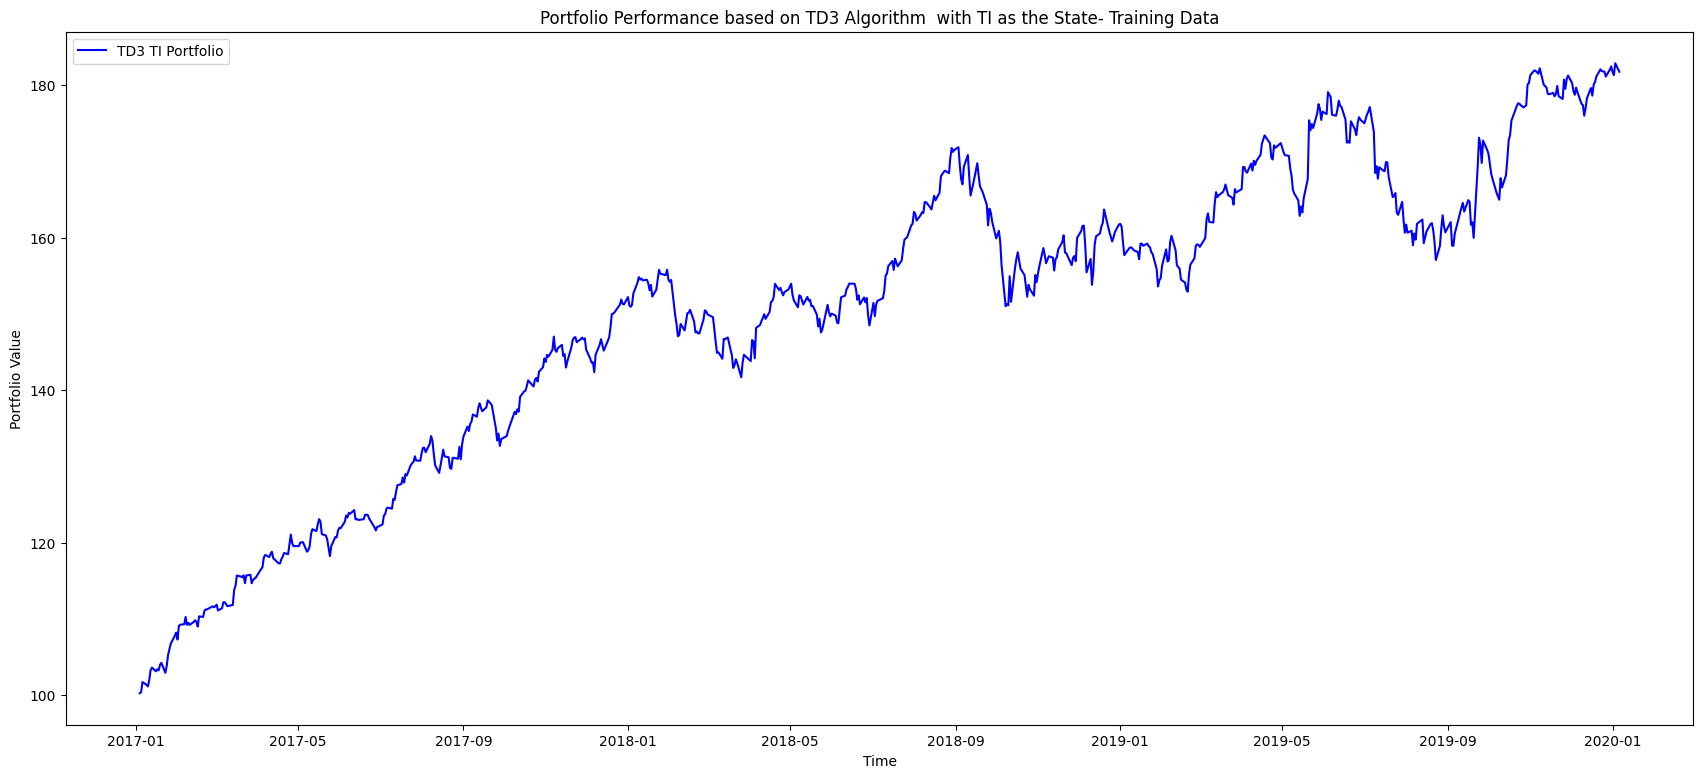

Final Portfolio Value: 181.79
Total Return: 81.79
Annualized Return: 22.57%
Sharpe Ratio: 1.5565
Maximum draw down(%): -12.3037


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(td3_train_returns_ti)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = td3_train_returns_ti['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="TD3 TI Portfolio", color="blue")
plt.title("Portfolio Performance based on TD3 Algorithm  with TI as the State- Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_td3_ti"] = portfolio_returns

# Calculate performance metrics
final_value_trg_td3_ti = capital
total_return_trg_td3_ti = final_value_trg_td3_ti - initial_capital
sharpe_ratio_trg_td3_ti = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_td3_ti = (final_value_trg_td3_ti / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_td3_ti = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_td3_ti:.2f}")
print(f"Total Return: {total_return_trg_td3_ti:.2f}")
print(f"Annualized Return: {annualized_return_trg_td3_ti * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_td3_ti:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_td3_ti:.4f}")

In [ ]:
# TD3 Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_ti, **env_kwargs)
env_td3_ti_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_ti_test'] = copy.copy(env_td3_ti_test)
DynaCAAST_Obs['td3_ti_test'] = obs_trade.copy()

td3_test_returns_ti, _ = DRLAgent.DRL_prediction(model=trained_td3_ti, test_data = test_data_ti, test_env = env_td3_ti_test, test_obs = obs_trade)

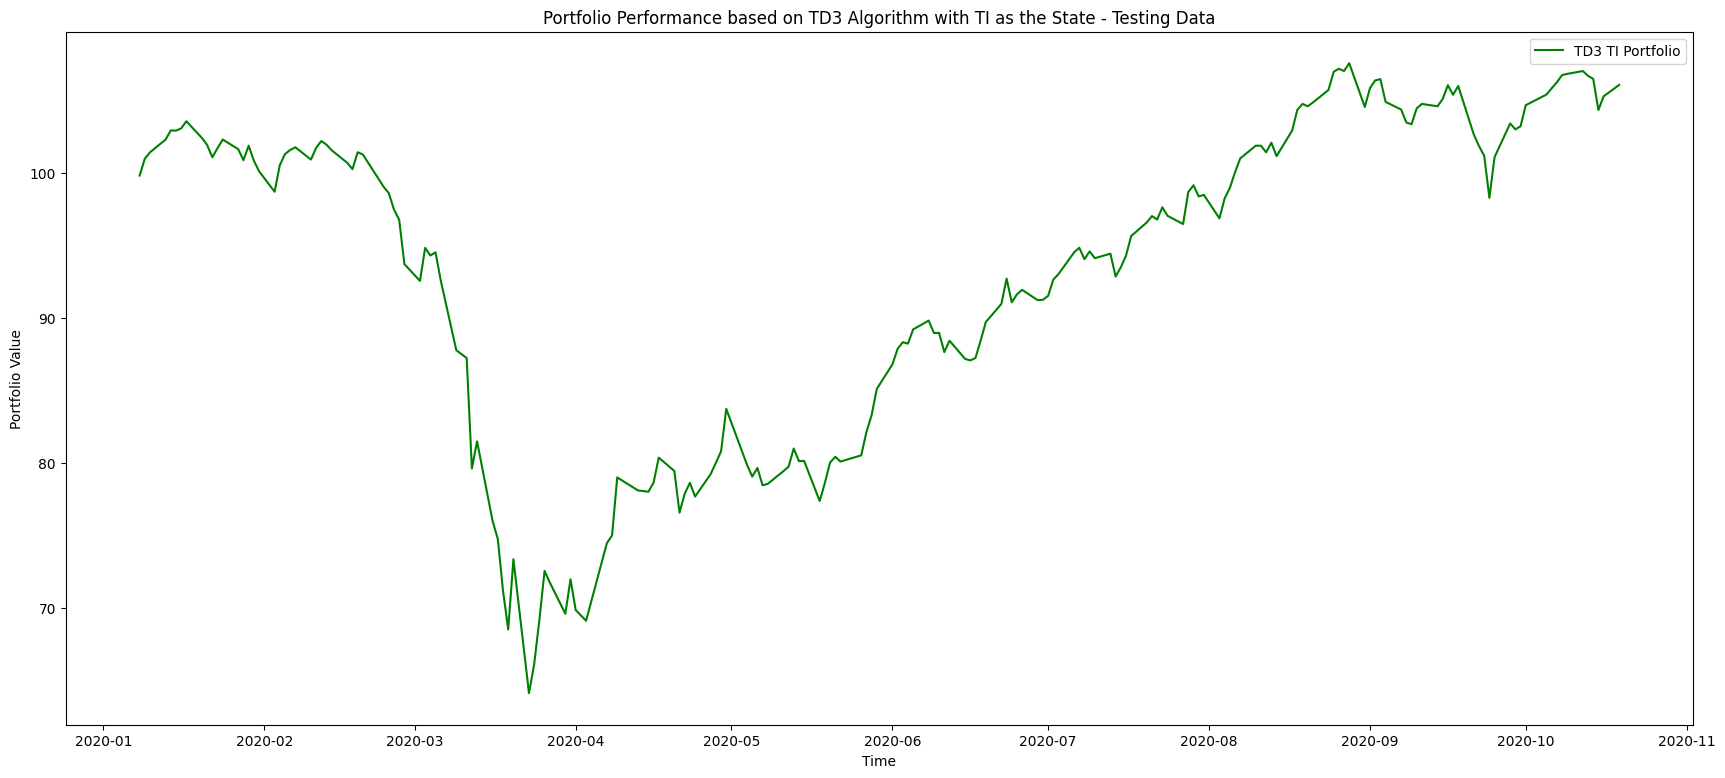

Final Portfolio Value: 106.04
Total Return: 6.04
Annualized Return: 7.83%
Sharpe Ratio: 0.3977
Maximum draw down(%): -38.0432


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(td3_test_returns_ti)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = td3_test_returns_ti['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(td3_test_returns_ti["date"][1:], portfolio_values, label="TD3 TI Portfolio", color="green")
plt.title("Portfolio Performance based on TD3 Algorithm with TI as the State - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_td3_ti"] = portfolio_returns

# Calculate performance metrics
final_value_test_td3_ti = capital
total_return_test_td3_ti = final_value_test_td3_ti - initial_capital
sharpe_ratio_test_td3_ti = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_td3_ti = (final_value_test_td3_ti / initial_capital) ** (1 / (len(td3_test_returns_ti) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_td3_ti = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_td3_ti:.2f}")
print(f"Total Return: {total_return_test_td3_ti:.2f}")
print(f"Annualized Return: {annualized_return_test_td3_ti * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_td3_ti:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_td3_ti:.4f}")

## **J. Performance Analysis of RL agents using TI as their states**

In [ ]:
returns_train = prices_train_data.pct_change() # get the assets daily returns
returns_test = prices_test_data.pct_change()


a2c_train_cum_returns_ti = (1 + a2c_train_returns_ti.copy().reset_index(drop=True).set_index(['date'])).cumprod()
a2c_train_cum_returns_ti = a2c_train_cum_returns_ti['daily_return']
a2c_train_cum_returns_ti.name = 'A2C TI Model'

ppo_train_cum_returns_ti = (1 + ppo_train_returns_ti.copy().reset_index(drop=True).set_index(['date'])).cumprod()
ppo_train_cum_returns_ti = ppo_train_cum_returns_ti['daily_return']
ppo_train_cum_returns_ti.name = 'PPO TI Model'

ddpg_train_cum_returns_ti = (1 + ddpg_train_returns_ti.copy().reset_index(drop=True).set_index(['date'])).cumprod()
ddpg_train_cum_returns_ti = ddpg_train_cum_returns_ti['daily_return']
ddpg_train_cum_returns_ti.name = 'DDPG TI Model'

sac_train_cum_returns_ti = (1 + sac_train_returns_ti.copy().reset_index(drop=True).set_index(['date'])).cumprod()
sac_train_cum_returns_ti = sac_train_cum_returns_ti['daily_return']
sac_train_cum_returns_ti.name = 'SAC TI Model'

td3_train_cum_returns_ti = (1 + td3_train_returns_ti.copy().reset_index(drop=True).set_index(['date'])).cumprod()
td3_train_cum_returns_ti = td3_train_cum_returns_ti['daily_return']
td3_train_cum_returns_ti.name = 'TD3 TI Model'

date_list = list(ddpg_train_cum_returns_ti.index)

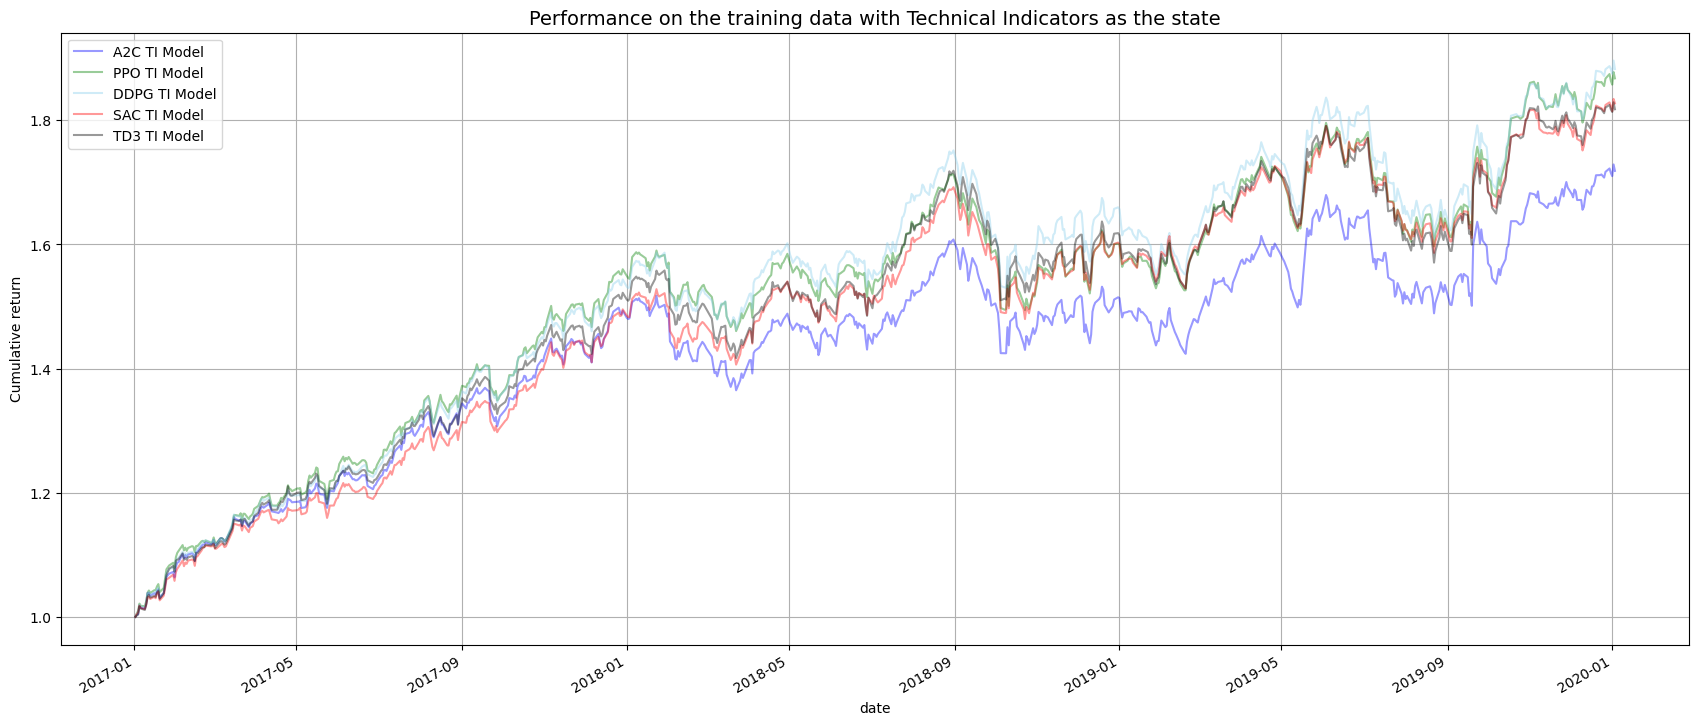

In [ ]:
%matplotlib inline

# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(21,9))
a2c_train_cum_returns_ti.plot(ax=ax, color='blue', alpha=0.4)
ppo_train_cum_returns_ti.plot(ax=ax, color='green', alpha=0.4)
ddpg_train_cum_returns_ti.plot(ax=ax, color='skyblue', alpha=0.4)
sac_train_cum_returns_ti.plot(ax=ax, color='red', alpha=0.4)
td3_train_cum_returns_ti.plot(ax=ax, color='black', alpha=0.4)

plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("Cumulative return");
ax.set_title("Performance on the training data with Technical Indicators as the state", fontsize=14);
plt.show()

In [ ]:
%matplotlib inline

# get the culmulative returns for each portfolio

a2c_test_cum_returns_ti = (1 + a2c_test_returns_ti['daily_return']).cumprod()
a2c_test_cum_returns_ti.name = 'A2C TI Model'
a2c_test_cum_returns_ti.index = a2c_test_returns_ti['date']

ppo_test_cum_returns_ti = (1 + ppo_test_returns_ti['daily_return']).cumprod()
ppo_test_cum_returns_ti.name = 'PPO TI Model'
ppo_test_cum_returns_ti.index = ppo_test_returns_ti['date']

ddpg_test_cum_returns_ti = (1 + ddpg_test_returns_ti['daily_return']).cumprod()
ddpg_test_cum_returns_ti.name = 'DDPG TI Model'
ddpg_test_cum_returns_ti.index = ddpg_test_returns_ti['date']

sac_test_cum_returns_ti = (1 + sac_test_returns_ti['daily_return']).cumprod()
sac_test_cum_returns_ti.name = 'SAC TI Model'
sac_test_cum_returns_ti.index = sac_test_returns_ti['date']

td3_test_cum_returns_ti = (1 + td3_test_returns_ti['daily_return']).cumprod()
td3_test_cum_returns_ti.name = 'TD3 TI Model'
td3_test_cum_returns_ti.index = td3_test_returns_ti['date']


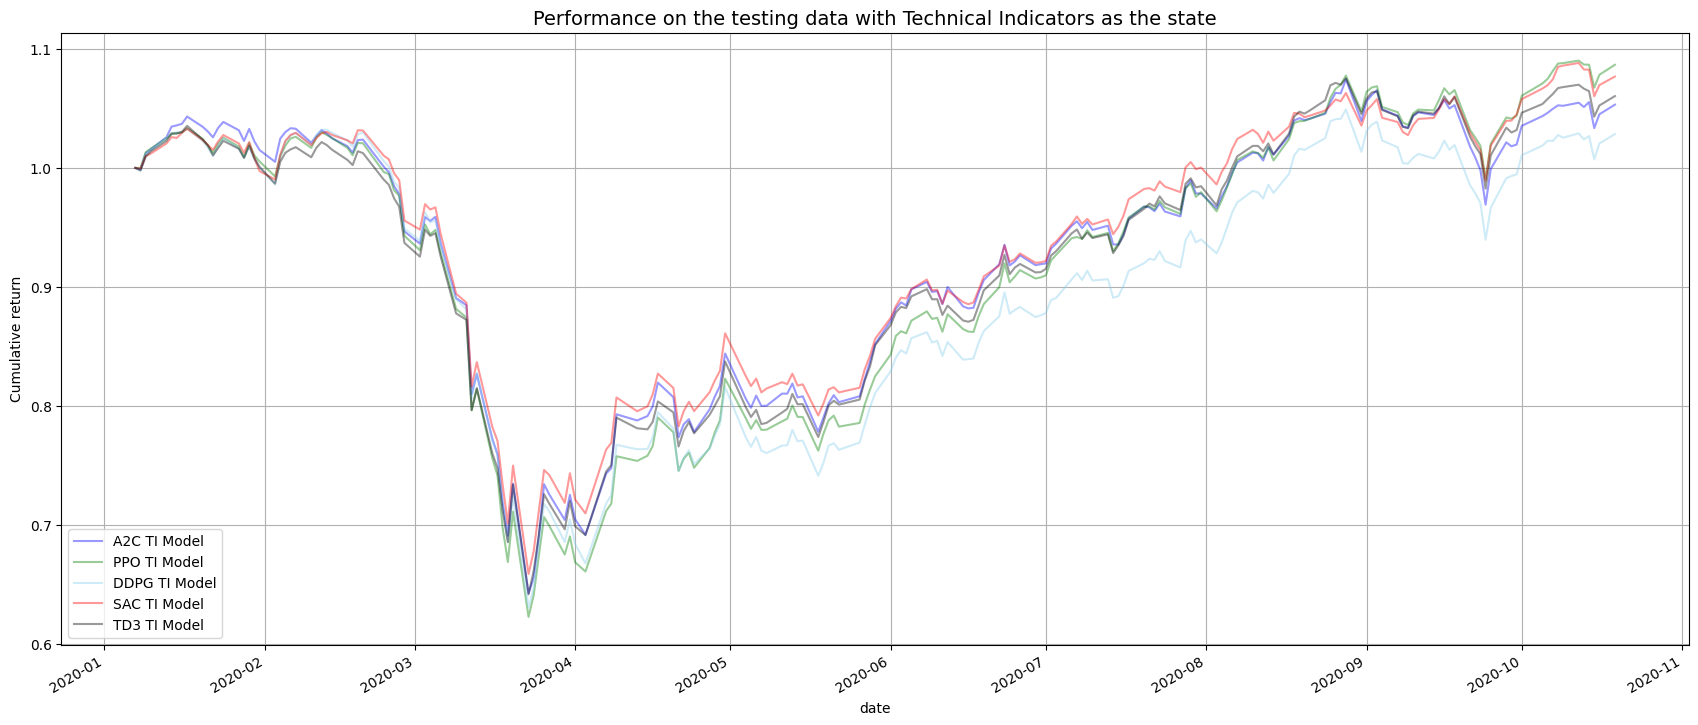

In [ ]:
%matplotlib inline
# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(21,9))
a2c_test_cum_returns_ti.plot(ax=ax, color='blue', alpha=.4)
ppo_test_cum_returns_ti.plot(ax=ax, color='green', alpha=.4)
ddpg_test_cum_returns_ti.plot(ax=ax, color='skyblue', alpha=.4)
sac_test_cum_returns_ti.plot(ax=ax, color='red', alpha=0.4)
td3_test_cum_returns_ti.plot(ax=ax, color='black', alpha=0.4)

plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("Cumulative return");
ax.set_title("Performance on the testing data with Technical Indicators as the state", fontsize=14);

## **K. A2C RL Model with Lagged Returns as the state of the RL agent**

In [ ]:
stock_dimension = len(tickers)
state_space = stock_dimension

In [ ]:
env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": return_lags,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

In [ ]:
e_train_gym = StockPortfolioEnv(df = train_data_ret, **env_kwargs)

In [ ]:
env_train, _ = e_train_gym.get_sb_env()

In [ ]:
# initialize
agent = DRLAgent(env = env_train)
model_a2c_ret = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS_RET)


{'n_steps': 500, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device


In [ ]:
trained_a2c_ret = agent.train_model(model=model_a2c_ret, tb_log_name='a2c', total_timesteps=total_timesteps_)
DynaCAAST_Model['a2c_ret'] = trained_a2c_ret

In [ ]:
import time
# A2C Train Model
e_trade_gym = StockPortfolioEnv(df = train_data_ret, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

a2c_train_returns_ret, _ = DRLAgent.DRL_prediction(model=trained_a2c_ret, test_data = train_data_ret, test_env = env_trade, test_obs = obs_trade)

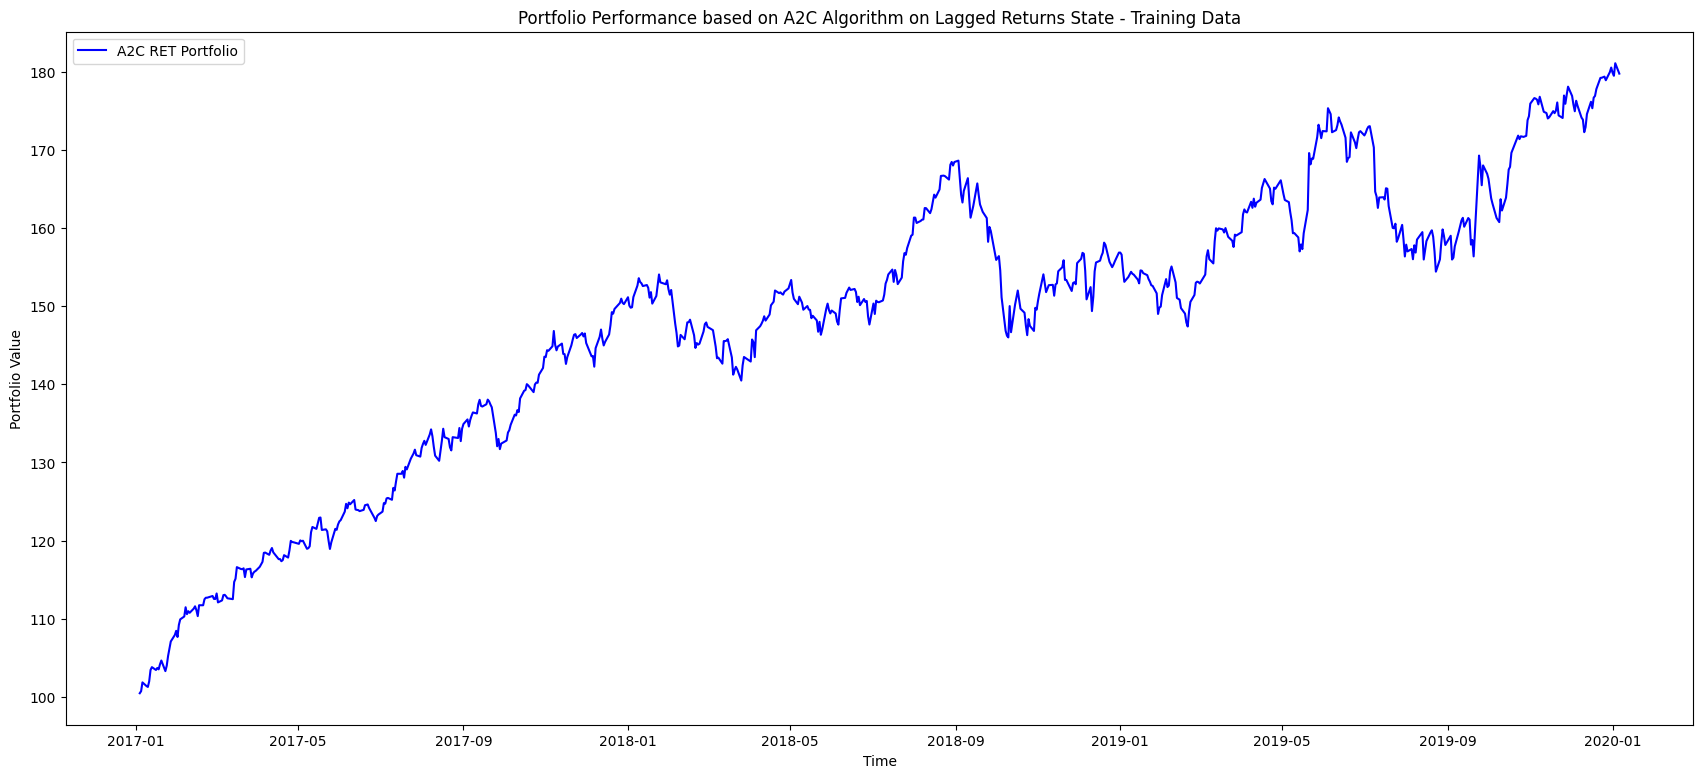

Final Portfolio Value: 179.73
Total Return: 79.73
Annualized Return: 22.10%
Sharpe Ratio: 1.5273
Maximum draw down(%): -13.4108


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(a2c_train_returns_ret)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = a2c_train_returns_ret['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="A2C RET Portfolio", color="blue")
plt.title("Portfolio Performance based on A2C Algorithm on Lagged Returns State - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_a2c_ret"] = portfolio_returns

# Calculate performance metrics
final_value_trg_a2c_ret = capital
total_return_trg_a2c_ret = final_value_trg_a2c_ret - initial_capital
sharpe_ratio_trg_a2c_ret = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_a2c_ret = (final_value_trg_a2c_ret / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_a2c_ret = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_a2c_ret:.2f}")
print(f"Total Return: {total_return_trg_a2c_ret:.2f}")
print(f"Annualized Return: {annualized_return_trg_a2c_ret * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_a2c_ret:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_a2c_ret:.4f}")

In [ ]:
# A2C Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_ret, **env_kwargs)
env_a2c_ret_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_ret_test'] = copy.copy(env_a2c_ret_test)
DynaCAAST_Obs['a2c_ret_test'] = obs_trade.copy()
a2c_test_returns_ret, _ = DRLAgent.DRL_prediction(model=trained_a2c_ret, test_data = test_data_ret, test_env = env_a2c_ret_test, test_obs = obs_trade)

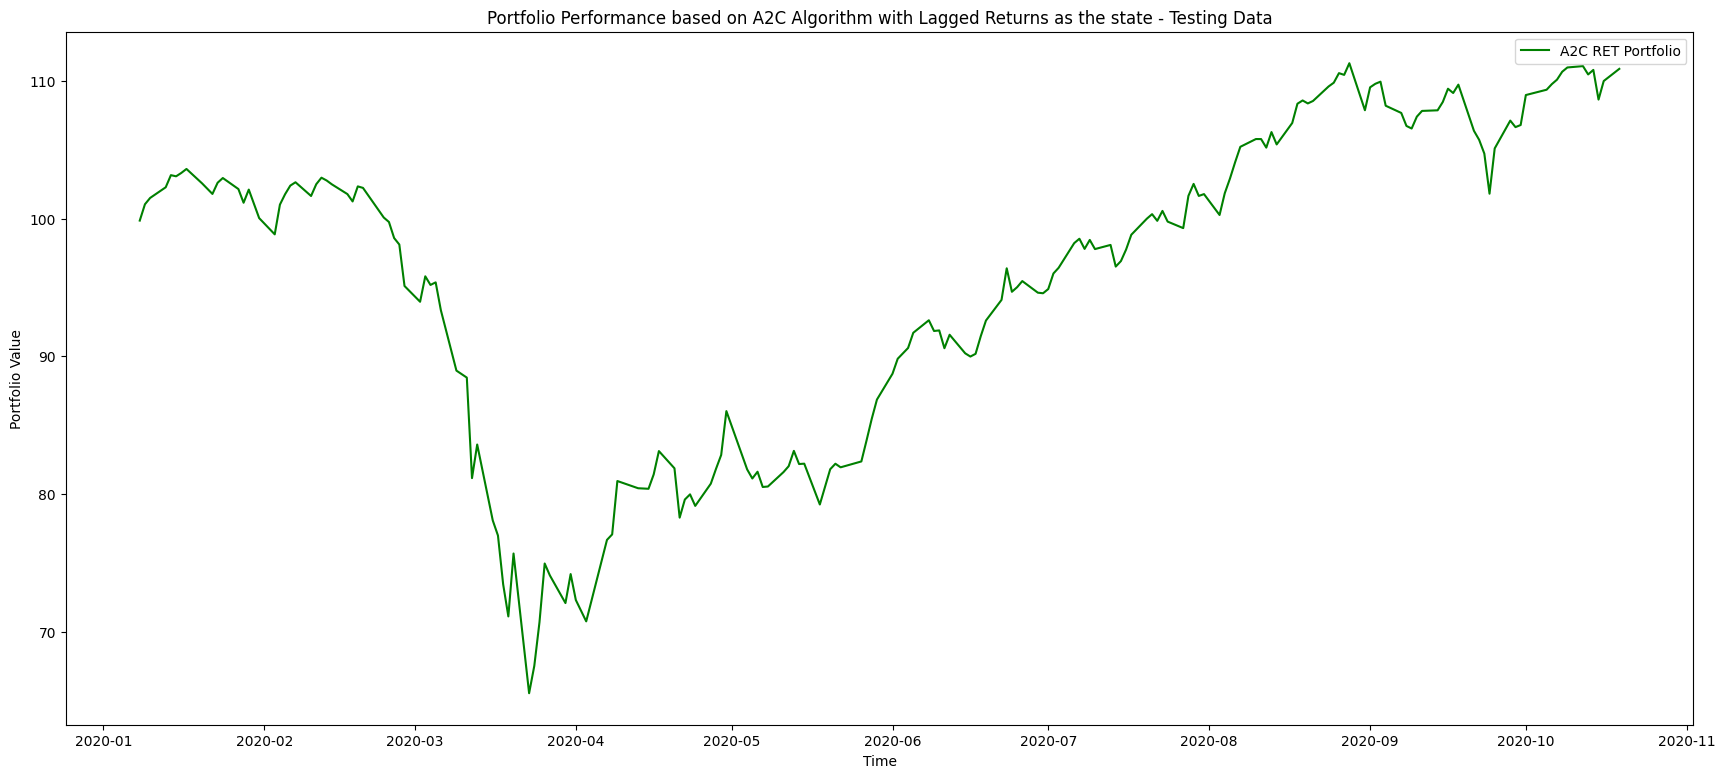

Final Portfolio Value: 110.88
Total Return: 10.88
Annualized Return: 14.20%
Sharpe Ratio : 0.5680
Maximum draw down(%): -36.7490


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(a2c_test_returns_ret)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = a2c_test_returns_ret['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(a2c_test_returns_ret["date"][1:], portfolio_values, label="A2C RET Portfolio", color="green")
plt.title("Portfolio Performance based on A2C Algorithm with Lagged Returns as the state - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_a2c_ret"] = portfolio_returns

# Calculate performance metrics
final_value_test_a2c_ret = capital
total_return_test_a2c_ret = final_value_test_a2c_ret - initial_capital
sharpe_ratio_test_a2c_ret = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_a2c_ret = (final_value_test_a2c_ret / initial_capital) ** (1 / (len(returns_test_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_a2c_ret = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_a2c_ret:.2f}")
print(f"Total Return: {total_return_test_a2c_ret:.2f}")
print(f"Annualized Return: {annualized_return_test_a2c_ret * 100:.2f}%")
print(f"Sharpe Ratio : {sharpe_ratio_test_a2c_ret:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_a2c_ret:.4f}")

## **L. PPO RL Model with Lagged Returns as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)

model_ppo_ret = agent.get_model("ppo", model_kwargs = PPO_PARAMS_RET)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device


In [ ]:
trained_ppo_ret = agent.train_model(model=model_ppo_ret, tb_log_name='ppo', total_timesteps=total_timesteps_)
DynaCAAST_Model['ppo_ret'] = trained_ppo_ret

-----------------------------
| time/              |      |
|    fps             | 563  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 510       |
|    iterations           | 2         |
|    time_elapsed         | 8         |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -38.3     |
|    explained_variance   | 0         |
|    learning_rate        | 0.0001    |
|    loss                 | 3.19e+14  |
|    n_updates            | 10        |
|    policy_gradient_loss | -7.84e-07 |
|    std                  | 1         |
|    value_loss           | 6.15e+14  |
---------------------------------------
------------------------------

In [ ]:
# PPO Train Model
e_trade_gym = StockPortfolioEnv(df = train_data_ret, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ppo_train_returns_ret, _ = DRLAgent.DRL_prediction(model=trained_ppo_ret, test_data = train_data_ret, test_env = env_trade, test_obs = obs_trade)

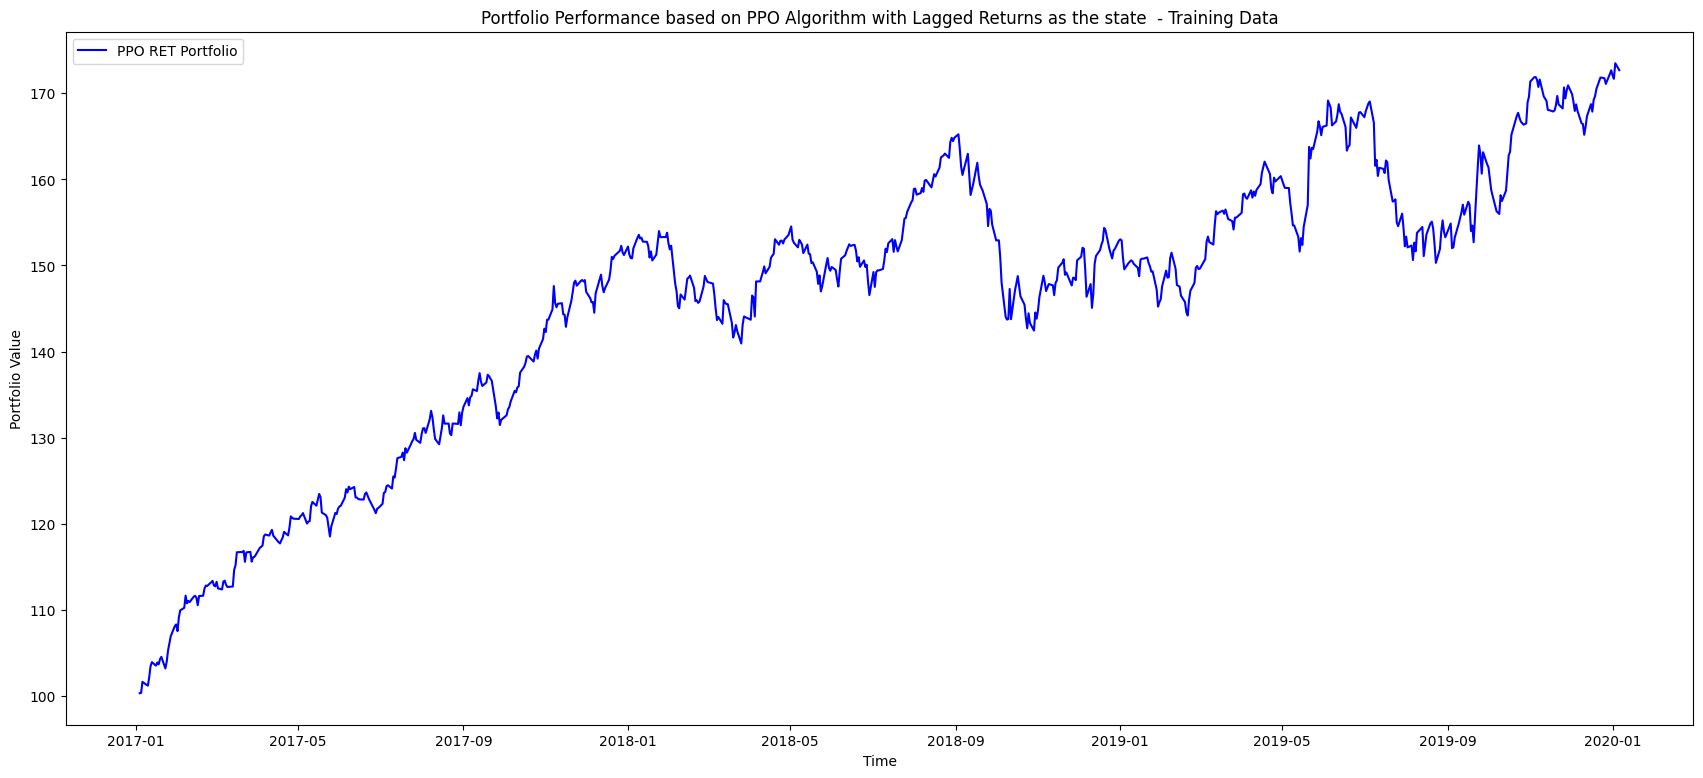

Final Portfolio Value: 172.70
Total Return: 72.70
Annualized Return: 20.45%
Sharpe Ratio: 1.4531
Maximum draw down(%): -13.7994


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ppo_train_returns_ret)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ppo_train_returns_ret['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="PPO RET Portfolio", color="blue")
plt.title("Portfolio Performance based on PPO Algorithm with Lagged Returns as the state  - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_ppo_ret"] = portfolio_returns

# Calculate performance metrics
final_value_trg_ppo_ret = capital
total_return_trg_ppo_ret = final_value_trg_ppo_ret - initial_capital
sharpe_ratio_trg_ppo_ret = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_ppo_ret = (final_value_trg_ppo_ret / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_ppo_ret = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_ppo_ret:.2f}")
print(f"Total Return: {total_return_trg_ppo_ret:.2f}")
print(f"Annualized Return: {annualized_return_trg_ppo_ret * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_ppo_ret:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_ppo_ret:.4f}")

In [ ]:
# PPO Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_ret, **env_kwargs)
env_ppo_ret_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_ret_test'] = copy.copy(env_ppo_ret_test)
DynaCAAST_Obs['ppo_ret_test'] = obs_trade.copy()
ppo_test_returns_ret, _ = DRLAgent.DRL_prediction(model=trained_ppo_ret, test_data = test_data_ret, test_env = env_ppo_ret_test, test_obs = obs_trade)

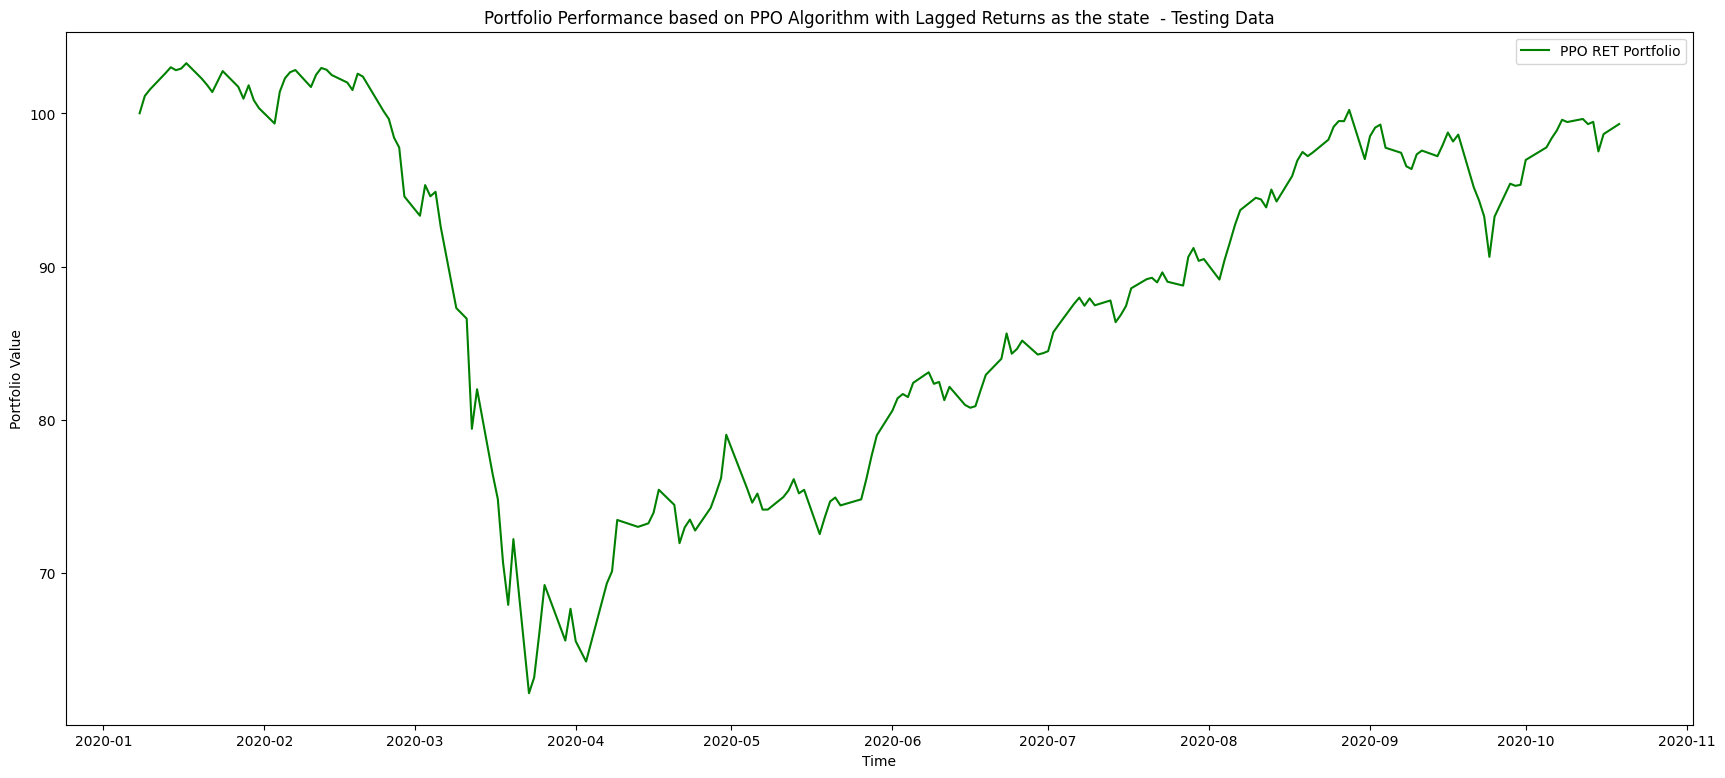

Final Portfolio Value: 99.31
Total Return: -0.69
Annualized Return: -0.89%
Sharpe Ratio: 0.1485
Maximum draw down(%): -39.8291


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ppo_test_returns_ret)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ppo_test_returns_ret['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(ppo_test_returns_ti["date"][1:], portfolio_values, label="PPO RET Portfolio", color="green")
plt.title("Portfolio Performance based on PPO Algorithm with Lagged Returns as the state  - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_ppo_ret"] = portfolio_returns

# Calculate performance metrics
final_value_test_ppo_ret = capital
total_return_test_ppo_ret = final_value_test_ppo_ret - initial_capital
sharpe_ratio_test_ppo_ret = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_ppo_ret = (final_value_test_ppo_ret / initial_capital) ** (1 / (len(ppo_test_returns_ret) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_ppo_ret = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_ppo_ret:.2f}")
print(f"Total Return: {total_return_test_ppo_ret:.2f}")
print(f"Annualized Return: {annualized_return_test_ppo_ret * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_ppo_ret:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_ppo_ret:.4f}")

## **M. DDPG RL Model with Lagged Returns as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)
model_ddpg_ret = agent.get_model("ddpg", model_kwargs = DDPG_PARAMS_RET)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [ ]:
trained_ddpg_ret = agent.train_model(model= model_ddpg_ret, tb_log_name='ddpg',  total_timesteps=total_timesteps_)
DynaCAAST_Model['ddpg_ret'] = trained_ddpg_ret

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 36        |
|    time_elapsed    | 81        |
|    total_timesteps | 2960      |
| train/             |           |
|    actor_loss      | -1.71e+07 |
|    critic_loss     | 3.21e+12  |
|    learning_rate   | 0.001     |
|    n_updates       | 2859      |
----------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 35       |
|    time_elapsed    | 165      |
|    total_timesteps | 5920     |
| train/             |          |
|    actor_loss      | -3.6e+07 |
|    critic_loss     | 1.97e+13 |
|    learning_rate   | 0.001    |
|    n_updates       | 5819     |
---------------------------------
----------------------------------
| time/              |           |
|    episodes        | 12        |
|    fps             | 35        |
|    time_elapsed    | 250      

In [ ]:
# DDPG Train Model num_stock = df_pct_change.shape[1]
e_trade_gym = StockPortfolioEnv(df = train_data_ret, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ddpg_train_returns_ret, _ = DRLAgent.DRL_prediction(model=trained_ddpg_ret, test_data = train_data_ret, test_env = env_trade, test_obs = obs_trade)

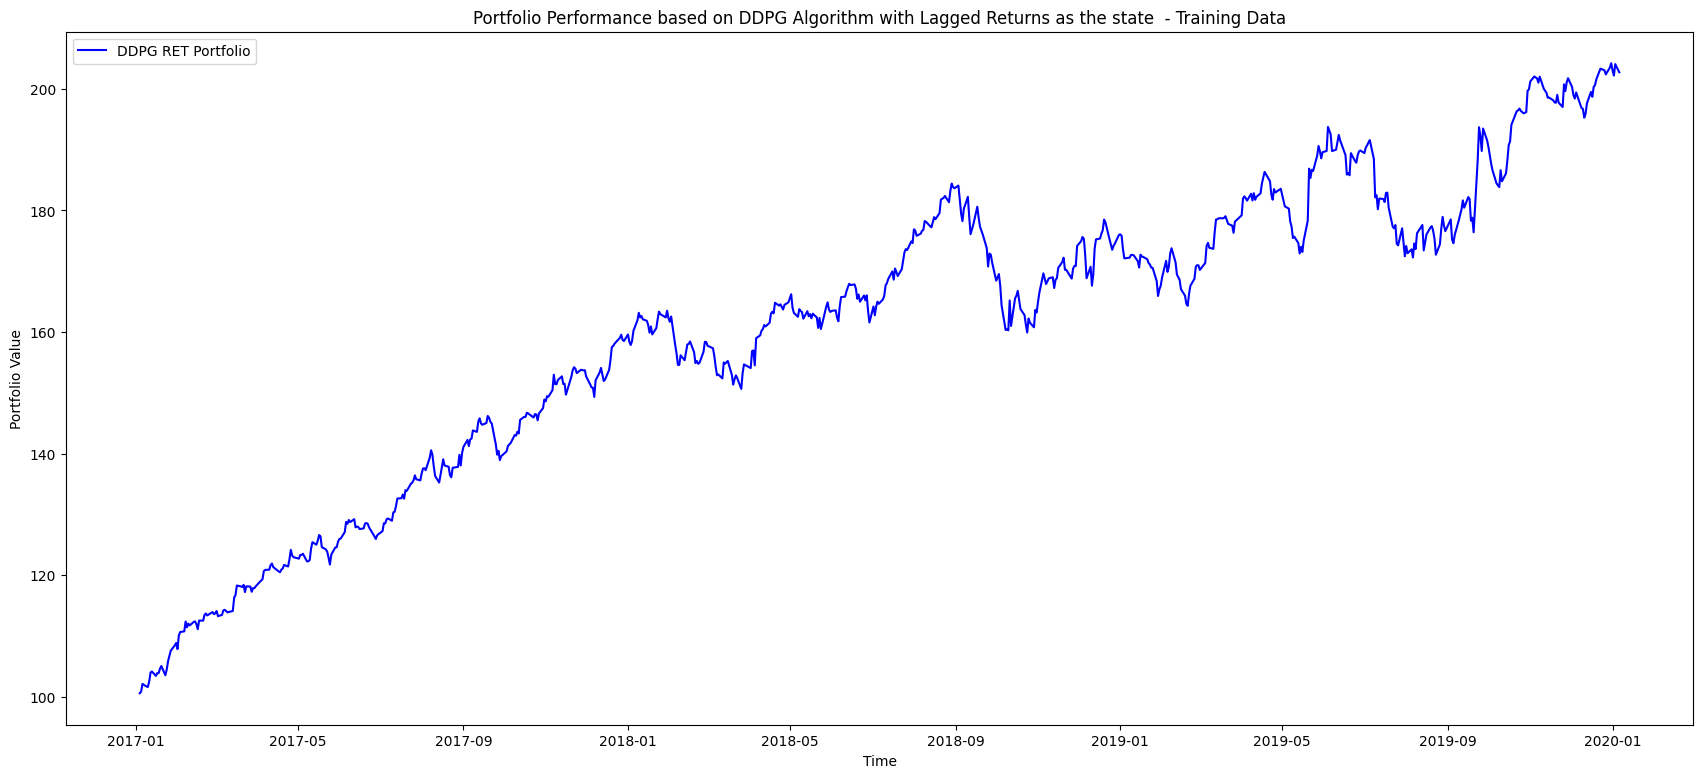

Final Portfolio Value: 202.73
Total Return: 102.73
Annualized Return: 27.21%
Sharpe Ratio: 1.7354
Maximum draw down(%): -13.2876


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ddpg_train_returns_ret)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ddpg_train_returns_ret['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="DDPG RET Portfolio", color="blue")
plt.title("Portfolio Performance based on DDPG Algorithm with Lagged Returns as the state  - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_ddpg_ret"] = portfolio_returns

# Calculate performance metrics
final_value_trg_ddpg_ret = capital
total_return_trg_ddpg_ret = final_value_trg_ddpg_ret - initial_capital
sharpe_ratio_trg_ddpg_ret = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_ddpg_ret = (final_value_trg_ddpg_ret / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_ddpg_ret = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_ddpg_ret:.2f}")
print(f"Total Return: {total_return_trg_ddpg_ret:.2f}")
print(f"Annualized Return: {annualized_return_trg_ddpg_ret * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_ddpg_ret:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_ddpg_ret:.4f}")

In [ ]:
# DDPG Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_ret, **env_kwargs)
env_ddpg_ret_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_ret_test'] = copy.copy(env_ddpg_ret_test)
DynaCAAST_Obs['ddpg_ret_test'] = obs_trade.copy()
ddpg_test_returns_ret, _ = DRLAgent.DRL_prediction(model=trained_ddpg_ret, test_data = test_data_ret, test_env = env_ddpg_ret_test, test_obs = obs_trade)

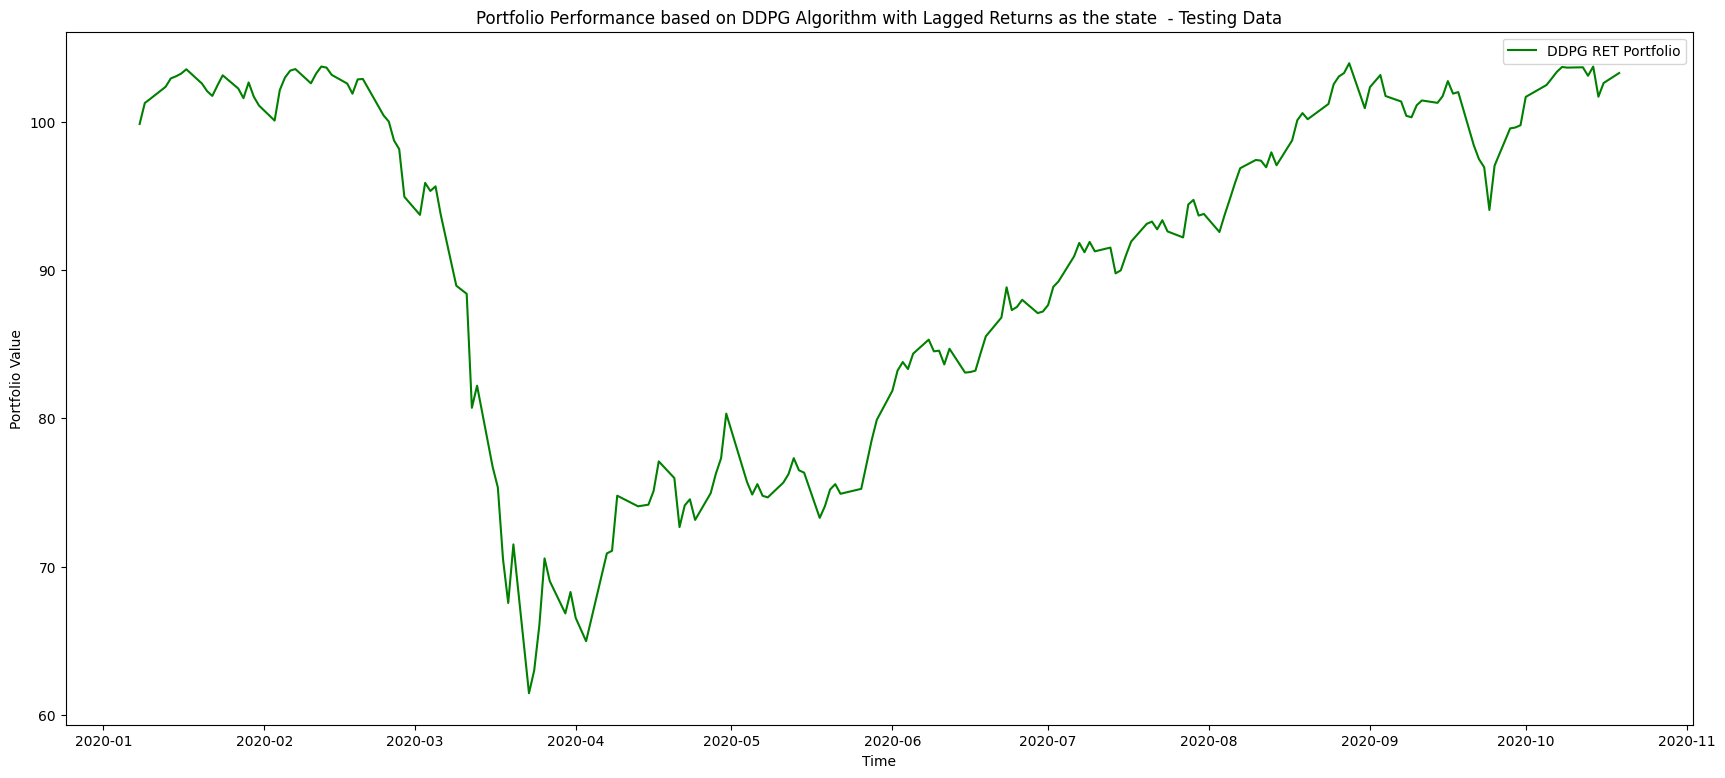

Final Portfolio Value: 103.28
Total Return: 3.28
Annualized Return: 4.24%
Sharpe Ratio: 0.2997
Maximum draw down(%): -40.7414


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(ddpg_test_returns_ret)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = ddpg_test_returns_ret['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(ddpg_test_returns_ret["date"][1:], portfolio_values, label="DDPG RET Portfolio", color="green")
plt.title("Portfolio Performance based on DDPG Algorithm with Lagged Returns as the state  - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_ddpg_ret"] = portfolio_returns

# Calculate performance metrics
final_value_test_ddpg_ret = capital
total_return_test_ddpg_ret = final_value_test_ddpg_ret - initial_capital
sharpe_ratio_test_ddpg_ret = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_ddpg_ret = (final_value_test_ddpg_ret / initial_capital) ** (1 / (len(ddpg_test_returns_ret) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_ddpg_ret = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_ddpg_ret:.2f}")
print(f"Total Return: {total_return_test_ddpg_ret:.2f}")
print(f"Annualized Return: {annualized_return_test_ddpg_ret * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_ddpg_ret:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_ddpg_ret:.4f}")

## **N. SAC RL Model with Lagged Returns as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)
model_sac_ret = agent.get_model("sac",model_kwargs = SAC_PARAMS_RET)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0003, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


In [ ]:
trained_sac_ret = agent.train_model(model=model_sac_ret, tb_log_name='sac', total_timesteps=total_timesteps_)
DynaCAAST_Model['sac_ret'] = trained_sac_ret

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 33        |
|    time_elapsed    | 87        |
|    total_timesteps | 2960      |
| train/             |           |
|    actor_loss      | -3.96e+06 |
|    critic_loss     | 1.21e+12  |
|    ent_coef        | 0.265     |
|    ent_coef_loss   | 395       |
|    learning_rate   | 0.0003    |
|    n_updates       | 2859      |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 33        |
|    time_elapsed    | 177       |
|    total_timesteps | 5920      |
| train/             |           |
|    actor_loss      | -1.67e+07 |
|    critic_loss     | 9.75e+12  |
|    ent_coef        | 0.654     |
|    ent_coef_loss   | 128       |
|    learning_rate   | 0.0003    |
|    n_updates       | 5819      |
----------------------------------
--------------------

In [ ]:
#  SAC Train Model num_stock = df_pct_change.shape[1]
e_trade_gym = StockPortfolioEnv(df = train_data_ret, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

sac_train_returns_ret, _ = DRLAgent.DRL_prediction(model=trained_sac_ret, test_data = train_data_ret, test_env = env_trade, test_obs = obs_trade)

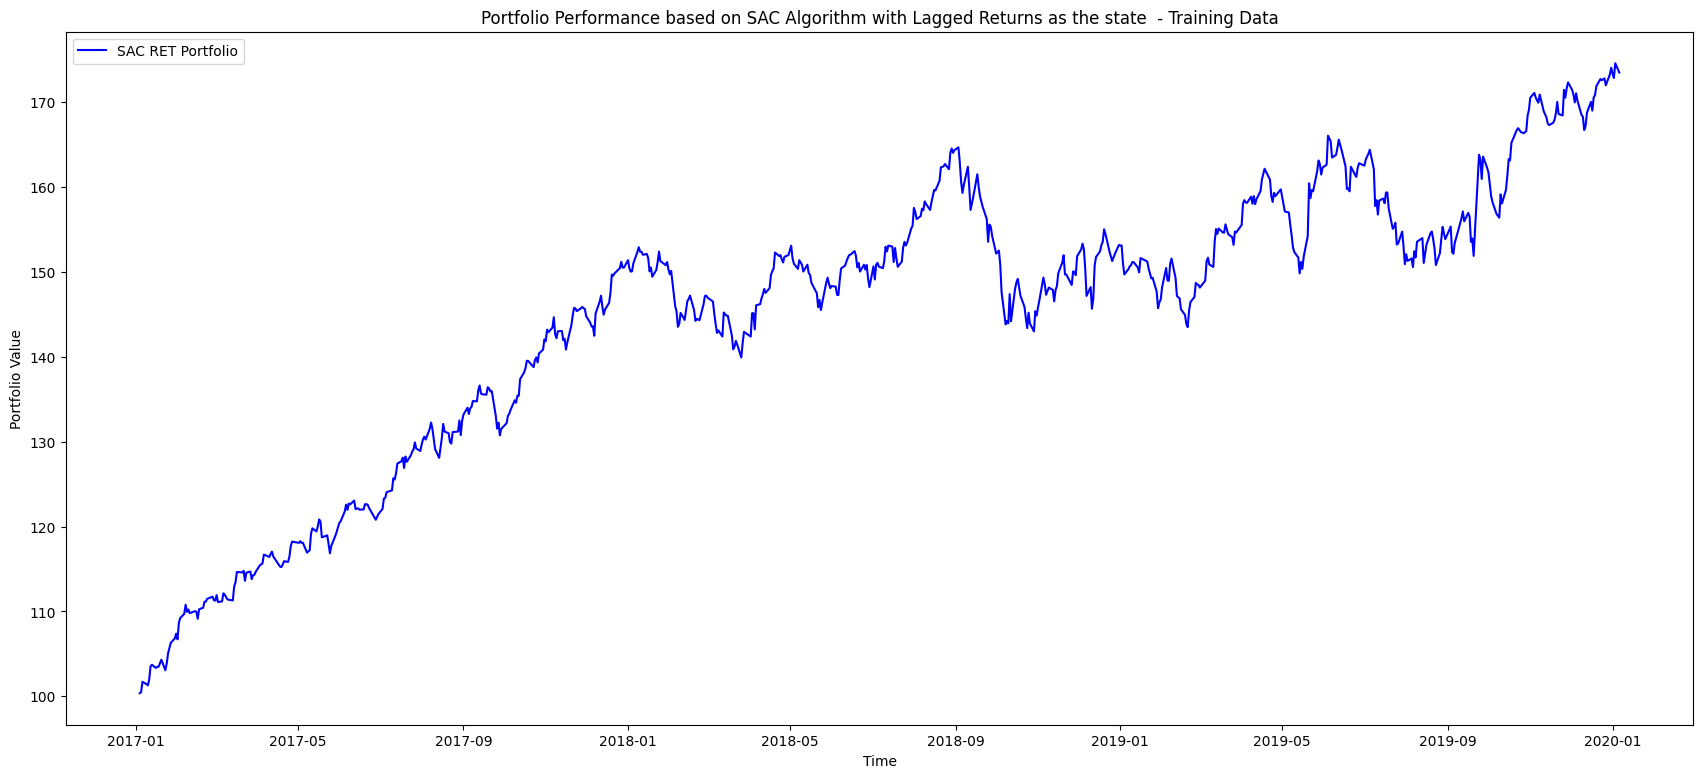

Final Portfolio Value: 173.51
Total Return: 73.51
Annualized Return: 20.64%
Sharpe Ratio Kelly: 1.4771
Maximum draw down(%): -13.1727


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(sac_train_returns_ret)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = sac_train_returns_ret['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="SAC RET Portfolio", color="blue")
plt.title("Portfolio Performance based on SAC Algorithm with Lagged Returns as the state  - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_sac_ret"] = portfolio_returns

# Calculate performance metrics
final_value_trg_sac_ret = capital
total_return_trg_sac_ret = final_value_trg_sac_ret - initial_capital
sharpe_ratio_trg_sac_ret = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_sac_ret = (final_value_trg_sac_ret / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_sac_ret = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_sac_ret:.2f}")
print(f"Total Return: {total_return_trg_sac_ret:.2f}")
print(f"Annualized Return: {annualized_return_trg_sac_ret * 100:.2f}%")
print(f"Sharpe Ratio Kelly: {sharpe_ratio_trg_sac_ret:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_sac_ret:.4f}")

In [ ]:
# SAC Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_ret, **env_kwargs)
env_sac_ret_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_ret_test'] = copy.copy(env_sac_ret_test)
DynaCAAST_Obs['sac_ret_test'] = obs_trade.copy()
sac_test_returns_ret, _ = DRLAgent.DRL_prediction(model=trained_sac_ret, test_data = test_data_ret, test_env = env_sac_ret_test, test_obs = obs_trade)

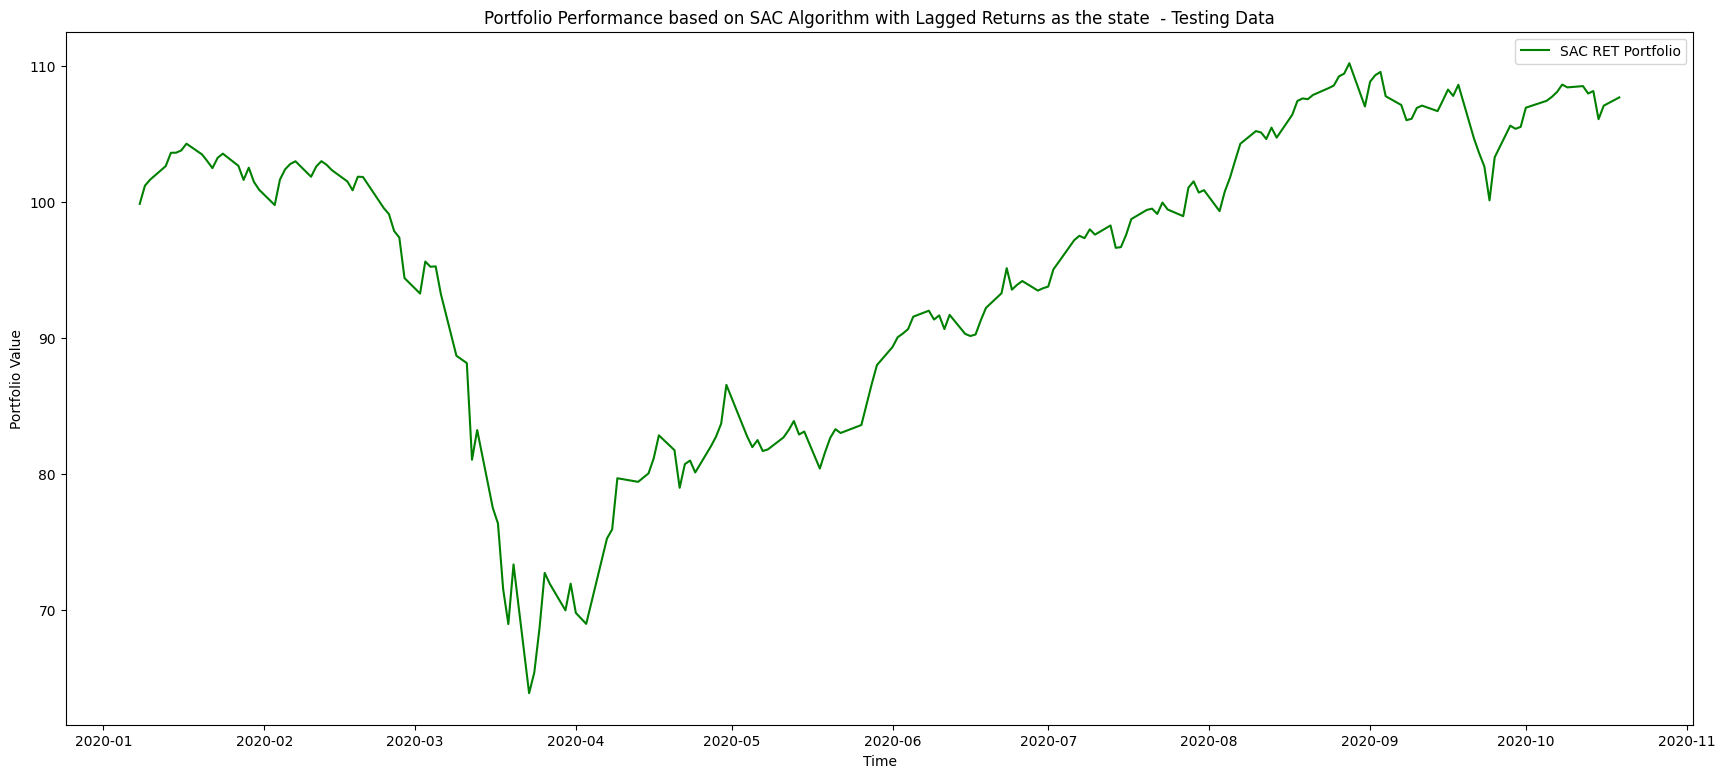

Final Portfolio Value: 107.70
Total Return: 7.70
Annualized Return: 10.01%
Sharpe Ratio: 0.4572
Maximum draw down(%): -38.7505


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(sac_test_returns_ret)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = sac_test_returns_ret['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(sac_test_returns_ret["date"][1:], portfolio_values, label="SAC RET Portfolio", color="green")
plt.title("Portfolio Performance based on SAC Algorithm with Lagged Returns as the state  - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_sac_ret"] = portfolio_returns

# Calculate performance metrics
final_value_test_sac_ret = capital
total_return_test_sac_ret = final_value_test_sac_ret - initial_capital
sharpe_ratio_test_sac_ret = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_sac_ret = (final_value_test_sac_ret / initial_capital) ** (1 / (len(sac_test_returns_ret) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_sac_ret = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_sac_ret:.2f}")
print(f"Total Return: {total_return_test_sac_ret:.2f}")
print(f"Annualized Return: {annualized_return_test_sac_ret * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_sac_ret:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_sac_ret:.4f}")

## **O. TD3 RL Model with Lagged Returns as the state of the RL agent**

In [ ]:
agent = DRLAgent(env = env_train)
model_td3_ret = agent.get_model("td3", model_kwargs = TD3_PARAMS_RET)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


In [ ]:
trained_td3_ret = agent.train_model(model=model_td3_ret, tb_log_name='td3', total_timesteps=total_timesteps_)
DynaCAAST_Model['td3_ret'] = trained_td3_ret

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 42        |
|    time_elapsed    | 70        |
|    total_timesteps | 2960      |
| train/             |           |
|    actor_loss      | -7.13e+06 |
|    critic_loss     | 1.57e+12  |
|    learning_rate   | 0.001     |
|    n_updates       | 2859      |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 40        |
|    time_elapsed    | 145       |
|    total_timesteps | 5920      |
| train/             |           |
|    actor_loss      | -1.31e+07 |
|    critic_loss     | 1.97e+12  |
|    learning_rate   | 0.001     |
|    n_updates       | 5819      |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 12        |
|    fps             | 39        |
|    time_elapsed   

In [ ]:
# td3 Train Model num_stock = df_pct_change.shape[1]
e_trade_gym = StockPortfolioEnv(df = train_data_ret, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

td3_train_returns_ret, _ = DRLAgent.DRL_prediction(model=trained_td3_ret, test_data = train_data_ret, test_env = env_trade, test_obs = obs_trade)

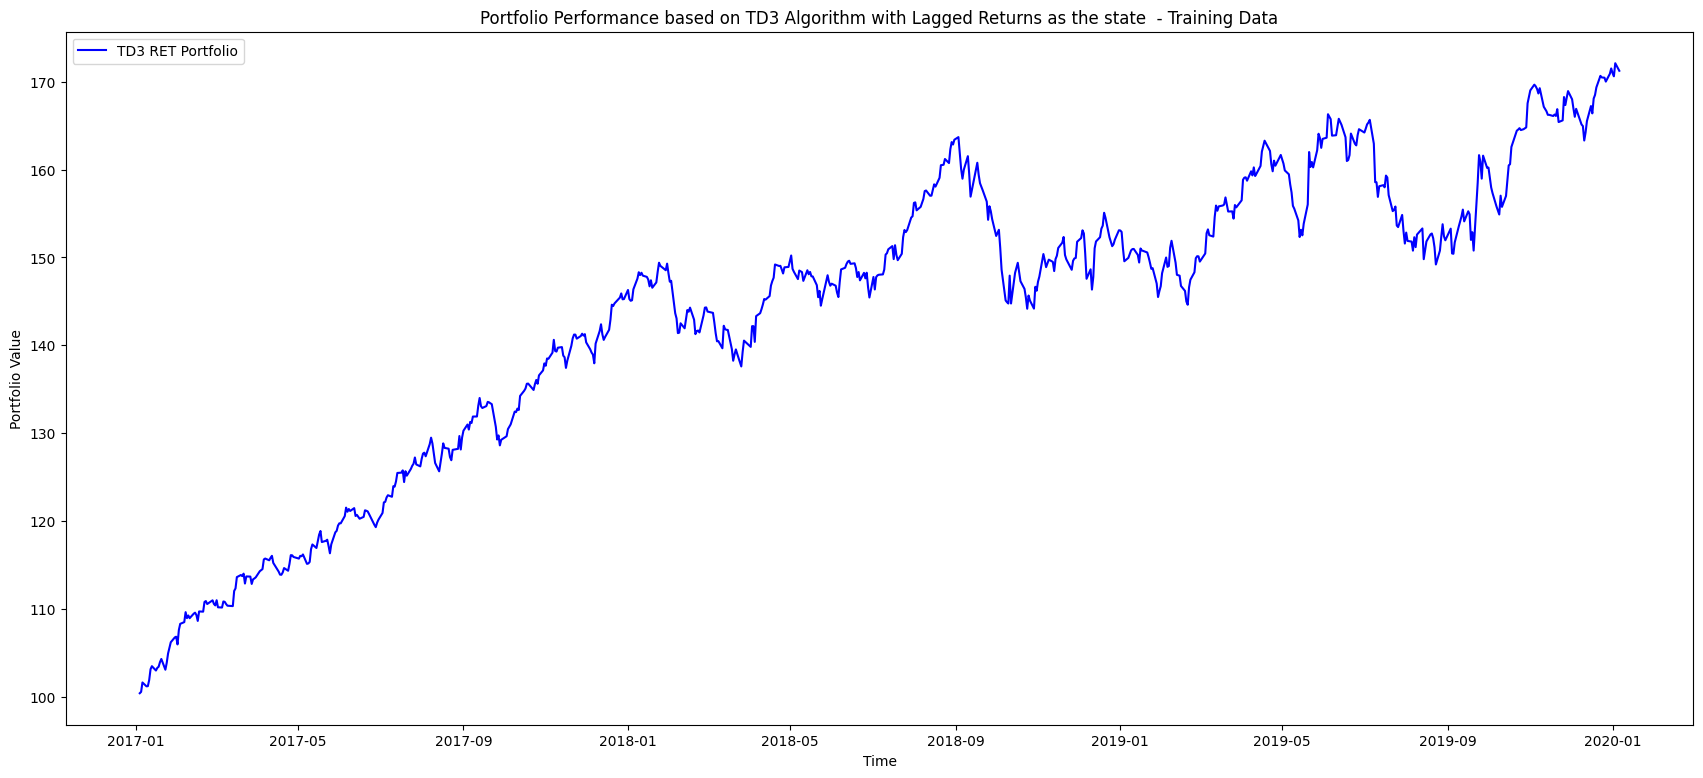

Final Portfolio Value: 171.25
Total Return: 71.25
Annualized Return: 20.10%
Sharpe Ratio: 1.5433
Maximum draw down(%): -11.9350


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(td3_train_returns_ret)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = td3_train_returns_ret['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(returns_train_data.index[1:], portfolio_values, label="TD3 RET Portfolio", color="blue")
plt.title("Portfolio Performance based on TD3 Algorithm with Lagged Returns as the state  - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_td3_ret"] = portfolio_returns

# Calculate performance metrics
final_value_trg_td3_ret = capital
total_return_trg_td3_ret = final_value_trg_td3_ret - initial_capital
sharpe_ratio_trg_td3_ret = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_trg_td3_ret = (final_value_trg_td3_ret / initial_capital) ** (1 / (len(returns_train_data) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_trg_td3_ret = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_trg_td3_ret:.2f}")
print(f"Total Return: {total_return_trg_td3_ret:.2f}")
print(f"Annualized Return: {annualized_return_trg_td3_ret * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_trg_td3_ret:.4f}")
print(f"Maximum draw down(%): {maxdraw_trg_td3_ret:.4f}")

In [ ]:
# TD3 Test Model
e_trade_gym = StockPortfolioEnv(df = test_data_ret, **env_kwargs)
env_td3_ret_test, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_ret_test'] = copy.copy(env_td3_ret_test)
DynaCAAST_Obs['td3_ret_test'] = obs_trade.copy()
td3_test_returns_ret, _ = DRLAgent.DRL_prediction(model=trained_td3_ret, test_data = test_data_ret, test_env = env_td3_ret_test, test_obs = obs_trade)

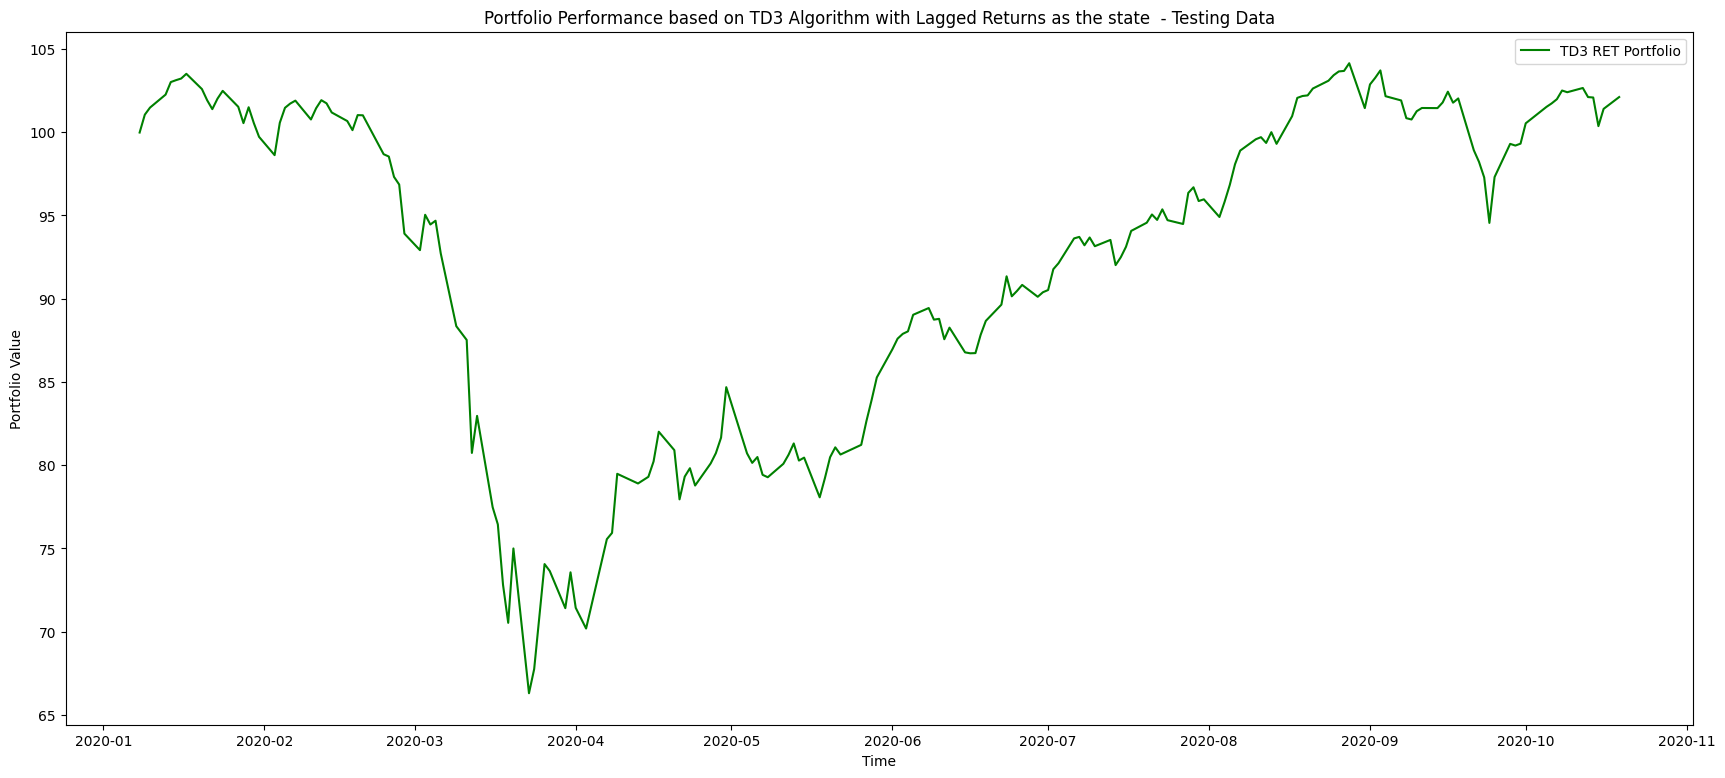

Final Portfolio Value: 102.11
Total Return: 2.11
Annualized Return: 2.72%
Sharpe Ratio: 0.2449
Maximum draw down(%): -35.9371


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(td3_test_returns_ret)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = td3_test_returns_ret['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(td3_test_returns_ret["date"][1:], portfolio_values, label="TD3 RET Portfolio", color="green")
plt.title("Portfolio Performance based on TD3 Algorithm with Lagged Returns as the state  - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_td3_ret"] = portfolio_returns

# Calculate performance metrics
final_value_test_td3_ret = capital
total_return_test_td3_ret = final_value_test_td3_ret - initial_capital
sharpe_ratio_test_td3_ret = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_td3_ret = (final_value_test_td3_ret / initial_capital) ** (1 / (len(td3_test_returns_ret) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_td3_ret = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_td3_ret:.2f}")
print(f"Total Return: {total_return_test_td3_ret:.2f}")
print(f"Annualized Return: {annualized_return_test_td3_ret * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_td3_ret:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_td3_ret:.4f}")

## **P. Performance Analysis of RL agents using Lagged Returns as their states**

In [ ]:
returns_train = prices_train_data.pct_change() # get the assets daily returns
returns_test = prices_test_data.pct_change()


a2c_train_cum_returns_ret = (1 + a2c_train_returns_ret.copy().reset_index(drop=True).set_index(['date'])).cumprod()
a2c_train_cum_returns_ret = a2c_train_cum_returns_ret['daily_return']
a2c_train_cum_returns_ret.name = 'A2C RET Model'

ppo_train_cum_returns_ret = (1 + ppo_train_returns_ret.copy().reset_index(drop=True).set_index(['date'])).cumprod()
ppo_train_cum_returns_ret = ppo_train_cum_returns_ret['daily_return']
ppo_train_cum_returns_ret.name = 'PPO RET Model'

ddpg_train_cum_returns_ret = (1 + ddpg_train_returns_ret.copy().reset_index(drop=True).set_index(['date'])).cumprod()
ddpg_train_cum_returns_ret = ddpg_train_cum_returns_ret['daily_return']
ddpg_train_cum_returns_ret.name = 'DDPG RET Model'

sac_train_cum_returns_ret = (1 + sac_train_returns_ret.copy().reset_index(drop=True).set_index(['date'])).cumprod()
sac_train_cum_returns_ret = sac_train_cum_returns_ret['daily_return']
sac_train_cum_returns_ret.name = 'SAC RET Model'

td3_train_cum_returns_ret = (1 + td3_train_returns_ret.copy().reset_index(drop=True).set_index(['date'])).cumprod()
td3_train_cum_returns_ret = td3_train_cum_returns_ret['daily_return']
td3_train_cum_returns_ret.name = 'TD3 RET Model'

date_list = list(ddpg_train_cum_returns_ret.index)

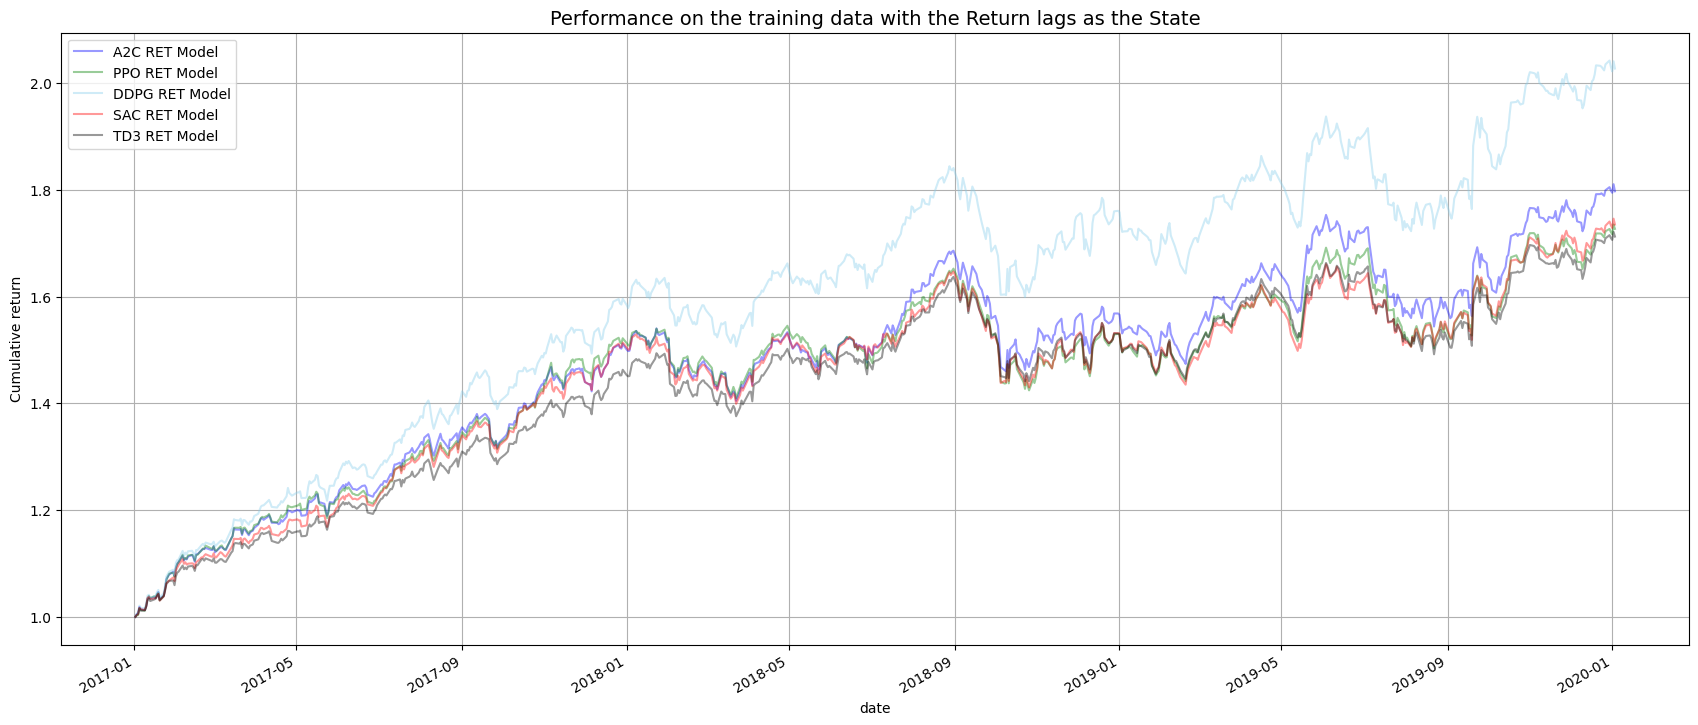

In [ ]:
%matplotlib inline

# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(21,9))
a2c_train_cum_returns_ret.plot(ax=ax, color='blue', alpha=0.4)
ppo_train_cum_returns_ret.plot(ax=ax, color='green', alpha=0.4)
ddpg_train_cum_returns_ret.plot(ax=ax, color='skyblue', alpha=0.4)
sac_train_cum_returns_ret.plot(ax=ax, color='red', alpha=0.4)
td3_train_cum_returns_ret.plot(ax=ax, color='black', alpha=0.4)

plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("Cumulative return");
ax.set_title("Performance on the training data with the Return lags as the State", fontsize=14);
plt.show()

In [ ]:
%matplotlib inline

# get the culmulative returns for each portfolio

a2c_test_cum_returns_ret = (1 + a2c_test_returns_ret['daily_return']).cumprod()
a2c_test_cum_returns_ret.name = 'A2C RET Model'
a2c_test_cum_returns_ret.index = a2c_test_returns_ret['date']

ppo_test_cum_returns_ret = (1 + ppo_test_returns_ret['daily_return']).cumprod()
ppo_test_cum_returns_ret.name = 'PPO RET Model'
ppo_test_cum_returns_ret.index = ppo_test_returns_ret['date']

ddpg_test_cum_returns_ret = (1 + ddpg_test_returns_ret['daily_return']).cumprod()
ddpg_test_cum_returns_ret.name = 'DDPG RET Model'
ddpg_test_cum_returns_ret.index = ddpg_test_returns_ret['date']

sac_test_cum_returns_ret = (1 + sac_test_returns_ret['daily_return']).cumprod()
sac_test_cum_returns_ret.name = 'SAC RET Model'
sac_test_cum_returns_ret.index = sac_test_returns_ret['date']

td3_test_cum_returns_ret = (1 + td3_test_returns_ret['daily_return']).cumprod()
td3_test_cum_returns_ret.name = 'TD3 RET Model'
td3_test_cum_returns_ret.index = td3_test_returns_ret['date']


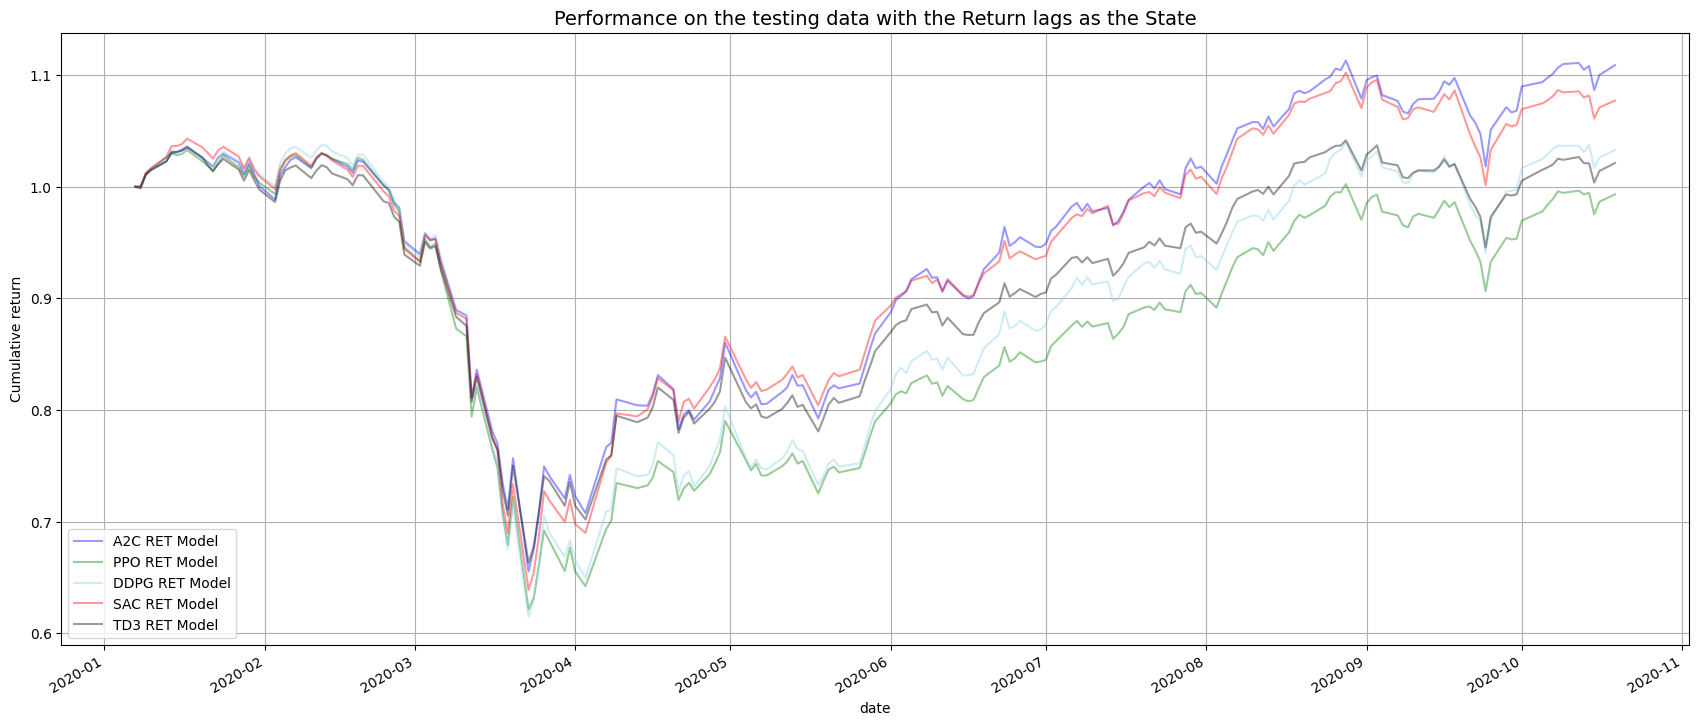

In [ ]:
%matplotlib inline
# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(21,9))
a2c_test_cum_returns_ret.plot(ax=ax, color='blue', alpha=.4)
ppo_test_cum_returns_ret.plot(ax=ax, color='green', alpha=.4)
ddpg_test_cum_returns_ret.plot(ax=ax, color='skyblue', alpha=.4)
sac_test_cum_returns_ret.plot(ax=ax, color='red', alpha=0.4)
td3_test_cum_returns_ret.plot(ax=ax, color='black', alpha=0.4)

plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("Cumulative return");
ax.set_title("Performance on the testing data with the Return lags as the State", fontsize=14);